# Pruebas análisis de datos

En el presente documentos se hace una síntesis del análisis que se ha llevado a cabo sobre los datos de AirBnB y las diferentes pruebas que se han hecho sobre estos para utilizarlos para el entrenamiento del modelo.

In [108]:
## Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re # Para obtener la superficie de la descripción de los apartamentos
## Para el cálculo de distancias entre apartamentos y medios de transporte
from geopy.distance import distance
from decimal import *

Importamos _data-set_ incial.

In [109]:
df = pd.read_csv('../data/listings.csv')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25288 entries, 0 to 25287
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25288 non-null  int64  
 1   listing_url                                   25288 non-null  object 
 2   scrape_id                                     25288 non-null  int64  
 3   last_scraped                                  25288 non-null  object 
 4   source                                        25288 non-null  object 
 5   name                                          25288 non-null  object 
 6   description                                   24375 non-null  object 
 7   neighborhood_overview                         11218 non-null  object 
 8   picture_url                                   25287 non-null  object 
 9   host_id                                       25288 non-null 

In [111]:
df.describe()

id     scrape_id       host_id  host_listings_count  \
count  2.528800e+04  2.528800e+04  2.528800e+04         25269.000000   
mean   6.439293e+17  2.025031e+13  2.583530e+08            53.929400   
std    5.357949e+17  0.000000e+00  2.083118e+08           144.357627   
min    2.185300e+04  2.025031e+13  7.952000e+03             1.000000   
25%    3.676095e+07  2.025031e+13  5.168513e+07             1.000000   
50%    8.115619e+17  2.025031e+13  2.228602e+08             4.000000   
75%    1.142574e+18  2.025031e+13  4.488906e+08            25.000000   
max    1.369179e+18  2.025031e+13  6.821759e+08          3311.000000   

       host_total_listings_count      latitude     longitude  accommodates  \
count               25269.000000  25288.000000  25288.000000  25288.000000   
mean                   63.880169     40.421572     -3.693851      3.159206   
std                   193.134128      0.023441      0.027972      1.905684   
min                     1.000000     40.331400     -3.883990      1.000000   
25%                     2.000000     40.409288     -3.707420      2.000000   
50%                     5.000000     40.420382     -3.700932      2.000000   
75%                    33.000000     40.431617     -3.684771      4.000000   
max                  8554.000000     40.577290     -3.545904     16.000000   

          bathrooms      bedrooms  ...  review_scores_cleanliness  \
count  19270.000000  22737.000000  ...               20090.000000   
mean       1.286897      1.437173  ...                   4.678302   
std        0.628857      0.995338  ...                   0.456137   
min        0.000000      0.000000  ...                   1.000000   
25%        1.000000      1.000000  ...                   4.590000   
50%        1.000000      1.000000  ...                   4.800000   
75%        1.500000      2.000000  ...                   4.950000   
max       15.000000     25.000000  ...                   5.000000   

       review_scores_checkin  review_scores_communication  \
count           20090.000000                 20091.000000   
mean                4.742479                     4.747868   
std                 0.448347                     0.474671   
min                 1.000000                     1.000000   
25%                 4.700000                     4.720000   
50%                 4.860000                     4.890000   
75%                 4.990000                     5.000000   
max                 5.000000                     5.000000   

       review_scores_location  review_scores_value  \
count            20088.000000         20087.000000   
mean                 4.747256             4.549966   
std                  0.383183             0.518818   
min                  1.000000             1.000000   
25%                  4.670000             4.440000   
50%                  4.870000             4.670000   
75%                  4.980000             4.840000   
max                  5.000000             5.000000   

       calculated_host_listings_count  \
count                    25288.000000   
mean                        36.220263   
std                         81.239399   
min                          1.000000   
25%                          1.000000   
50%                          3.000000   
75%                         19.000000   
max                        341.000000   

       calculated_host_listings_count_entire_homes  \
count                                 25288.000000   
mean                                     32.311768   
std                                      80.203422   
min                                       0.000000   
25%                                       0.000000   
50%                                       1.000000   
75%                                      12.000000   
max                                     341.000000   

       calculated_host_listings_count_private_rooms  \
count                                  25288.000000   
mean                                   

## Limpieza inicial de datos

### Datos inútiles

A primera vista ya se ve que hay una gran cantidad de datos que, aunque puedan afectar al precio, no existen dentro del _data-set_ de Idealista.

Procedemos a hacer una primera limpiaeza borrando dichos valores.

In [112]:
dropping_cols = ["scrape_id", 
                 "last_scraped", 
                 "source", # Datos sobre scrapping innecesarios
                 "neighborhood_overview", # Descripción de la zona por el propietario con muchos valores nulos
                 "picture_url", # Imagen del apartamento
                 "host_id",
                 "host_url", 
                 "host_name", 
                 "host_since", 
                 "host_location", 
                 "host_about", 
                 "host_thumbnail_url", 
                 "host_response_time",
                 "host_response_rate",
                 "host_acceptance_rate",
                 "host_is_superhost",
                 "host_picture_url", 
                 "host_neighbourhood", 
                 "host_listings_count", 
                 "host_total_listings_count", 
                 "host_verifications", 
                 "host_has_profile_pic", 
                 "host_identity_verified", # Datos del propietario inútiles para el entrenamiento del model
                 "neighbourhood", # Etiquelas con poco valor, repetidas en su mayoría de diferentes formas
                 "neighbourhood_cleansed", # Etiquetas con las que no contamos en data-set de Idealista. Con coordenadas y neighbourhood_group_cleansed tenemos toda la información sobre localización necesaria
                 "bathrooms_text", # En data-set de Idealista solo tenemos la cantidad de baños, no su descripción
                 "beds", # Número de habitaciones de mayor utilidad
                 "minimum_nights",
                 "maximum_nights",
                 "minimum_minimum_nights",
                 "minimum_maximum_nights",
                 "maximum_minimum_nights",
                 "maximum_maximum_nights",
                 "minimum_nights_avg_ntm",
                 "maximum_nights_avg_ntm", # Datos dependientes de los propietarios, no de las viviendas
                 "calendar_updated",
                 "has_availability",
                 "availability_30",
                 "availability_60",
                 "availability_90",
                 "availability_365", 
                 "calendar_last_scraped", # Datos sobre disponibilidad. Sin utilidad para el modelo
                 "number_of_reviews",
                 "number_of_reviews_ltm",
                 "number_of_reviews_l30d",
                 "availability_eoy",
                 "number_of_reviews_ly",
                 "estimated_revenue_l365d",
                 "estimated_occupancy_l365d", # Estimaciones que no tenemos claro de dónde salen ni cómo las han calculado. Por lo quue no lo utilizamos
                 "first_review",
                 "last_review",
                 "review_scores_rating",
                 "review_scores_accuracy",
                 "review_scores_cleanliness",
                 "review_scores_checkin",
                 "review_scores_communication",
                 "review_scores_location",
                 "review_scores_value", # Datos sobre reviews, pueden afectar al precio pero no son últiles para el entrenamiento del modelo
                 "license", # Datos de licencia inútiles
                 "instant_bookable",
                 "calculated_host_listings_count",
                 "calculated_host_listings_count_entire_homes",
                 "calculated_host_listings_count_private_rooms",
                 "calculated_host_listings_count_shared_rooms",
                 "reviews_per_month"] # Información sobre los anuncios en sí y los propietarios que no afectan al precio por noche de los apartamentos

df = df.drop(dropping_cols, axis=1)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25288 entries, 0 to 25287
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            25288 non-null  int64  
 1   listing_url                   25288 non-null  object 
 2   name                          25288 non-null  object 
 3   description                   24375 non-null  object 
 4   neighbourhood_group_cleansed  25288 non-null  object 
 5   latitude                      25288 non-null  float64
 6   longitude                     25288 non-null  float64
 7   property_type                 25288 non-null  object 
 8   room_type                     25288 non-null  object 
 9   accommodates                  25288 non-null  int64  
 10  bathrooms                     19270 non-null  float64
 11  bedrooms                      22737 non-null  float64
 12  amenities                     25288 non-null  object 
 13  p

### Anuncios sin precio

El valor _target_ que utilizaremos para el modelo será el precio, por lo que borraremos todos aquellos anuncios que no tengan datos sobre el precio.

In [114]:
df = df.dropna(subset='price')

### Anuncios repetidos

También hay que borrar todos los anuncios que se encentren duplicados. Para ello, utilizaremos las columnas de _name_ y _description_.

In [115]:
df["name_description"] = df["name"].fillna(" ").str.lower() + " and " + df["description"].fillna(" ").str.lower()
df["name_description"].groupby(df["name_description"]).count()[df["name_description"].groupby(df["name_description"]).count() > 1].sort_values(ascending=False)

name_description
fantastic residence ``funway´´ north zone madrid and modern and bright space in the financial district of madrid, only 20 minutes away from the city center.<br />perfectly communicated with lines 1 (tetuan) and 10 ( cuzco ) of metro and various bus lines.<br />very near to chamartín and nuevos ministerios stations.                                                                                                                                                                                                                                  18
flamenco style apartment | palacio real, la latina and wonderful apartment located just above one of the oldest flamenco tablao in madrid, the corral de la morería, recently renovated opting for quality and comfort, offering an incredible rest. located in one of the most central areas of madrid that offers a multitude of restaurants, leisure and culture a few steps from the nerve center of the city. it has a bedroom with a queen size 

Observamos que, efectivamente, hay varios anuncios que se encuentran repetidos. Borramos todos los repetidos menos uno.

In [116]:
df.drop_duplicates(subset=["name_description"], keep="first", inplace=True)

Se pueden borrar las columnas de _name_ y _description_ dado que ya hemos creado una columna que cuenta con toda esta información, la cual utilizaremos más adelante para obtener más datos.

In [117]:
df = df.drop(['name', 'description'], axis=1)

### Anuncios que no sean de viviendas completas

Dado que en el _data-set_ de Idealista solo hay datos sobre viviendas completas, no tiene sentido entrenar el modelo con otros tipos de anuncios que no sean viviendas completas. 

Es por ello que borramos todos los anuncios que no cumplan con esta condición.

In [118]:
df = df[df['room_type']== 'Entire home/apt']

In [119]:
property_types_to_remove = ['Camper/RV', 'Room in aparthotel', 'Entire cabin','Hut','Yurt','Entire Bungalow']
df = df[~df['property_type'].isin(property_types_to_remove)]

Hecho esto, podemos borrar las columnas de _room_type_ y de _property_type_ dado que ya no ofrecen ninguna información de valor.

In [120]:
df = df.drop(['room_type', 'property_type'], axis=1)

## Cambio en tipos de datos

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13632 entries, 5 to 25285
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13632 non-null  int64  
 1   listing_url                   13632 non-null  object 
 2   neighbourhood_group_cleansed  13632 non-null  object 
 3   latitude                      13632 non-null  float64
 4   longitude                     13632 non-null  float64
 5   accommodates                  13632 non-null  int64  
 6   bathrooms                     13631 non-null  float64
 7   bedrooms                      13627 non-null  float64
 8   amenities                     13632 non-null  object 
 9   price                         13632 non-null  object 
 10  name_description              13632 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.2+ MB


### Baños, habitaciones

In [122]:
df['bedrooms'].unique()

array([ 1.,  3.,  0.,  2.,  4.,  5.,  6.,  8.,  7., nan,  9.])

In [123]:
df['bedrooms'].unique()

array([ 1.,  3.,  0.,  2.,  4.,  5.,  6.,  8.,  7., nan,  9.])

Tanto en baños como en habitaciones observamos que hay tanto apartamentos con 0 unidades de cada uno como valores desconocidos. Esto seguramente sea porque se trate de apartamentos en los que, o bien no se ha especificado el dato, o bien se trata de apartamentos tipo _loft_. En todo caso, es lógico pensar que cualquier vivienta cuenta, por lo menos, con 1 baño y 1 habitación. Por lo que cambiaremos los valores nulos y los desconocidos por 1.

Además, el tipo de dato con el que están guardados dichos datos es de tipo _float_ cuando claramente se trata de datos tipo _int_. Por lo que también cambiaremos esto.

In [124]:
df['bathrooms'] = df['bathrooms'].replace([np.inf,-np.inf],np.nan).fillna(0).astype(int)
df['bedrooms'] = df['bedrooms'].replace([np.inf,-np.inf],np.nan).fillna(0).astype(int)

df['bathrooms'] = df['bathrooms'].replace(0,1)
df['bedrooms'] = df['bedrooms'].replace(0,1)

### Precio

In [125]:
df['price'].unique()

array(['$66.00', '$89.00', '$173.00', '$72.00', '$189.00', '$94.00',
       '$90.00', '$87.00', '$82.00', '$170.00', '$351.00', '$229.00',
       '$177.00', '$86.00', '$57.00', '$88.00', '$118.00', '$114.00',
       '$100.00', '$160.00', '$71.00', '$110.00', '$138.00', '$91.00',
       '$131.00', '$106.00', '$64.00', '$129.00', '$63.00', '$243.00',
       '$62.00', '$277.00', '$144.00', '$84.00', '$120.00', '$95.00',
       '$97.00', '$70.00', '$80.00', '$101.00', '$141.00', '$259.00',
       '$75.00', '$102.00', '$116.00', '$98.00', '$67.00', '$166.00',
       '$127.00', '$152.00', '$96.00', '$190.00', '$300.00', '$109.00',
       '$76.00', '$176.00', '$78.00', '$148.00', '$204.00', '$132.00',
       '$65.00', '$85.00', '$154.00', '$222.00', '$225.00', '$169.00',
       '$73.00', '$126.00', '$214.00', '$145.00', '$136.00', '$143.00',
       '$108.00', '$209.00', '$159.00', '$119.00', '$83.00', '$122.00',
       '$149.00', '$202.00', '$112.00', '$39.00', '$459.00', '$93.00',
       '$4

Observamos que los datos de precios por noche están guardados como tipo _object_ al ser _strings_ con el símbolo del dolar.

Vamos a pasarlos a valores numéricos tipo _float_.

In [126]:
df['price'] = df['price'].replace({'\\$': '', ',': ''}, regex=True).astype(float)

### Distritos

Contamos con la columna de _neighbourhood_group_cleansed_ en la cual se indica en cuál de los 21 distritos de la ciudad de Madrid se encuentran cada uno de los apartamenos. Es por ello que da la sensación de ser una información muy útil para la predicción de los precios.

Lo que no es tan obvia es la forma que deben tener los datos de dicha columna para que dé el mejor resultado para el futuro entrenamiento de modelos de regresión lineal.

En el DS tal como está ahora son unos datos tipo _object_. Se puede dejar así y después convertirlos a datos numéricos aplicando el _One_Hot_Encoder_.

También se podrían pasar a una sola columna de valores numéricos de dos formas:

- Crear una variable _**neighbourhood_num**_ en que se cree una escala la cual irá de 1 para el distrito con mayor **precio/noche** medio a 21 para el distrito con menor **precio/noche** medio
- Crear una variable _**neighbourhood_scale**_ en que se cree una escala la cual irá de 1 que hará referencia al mayor **precio/noche** medio entre todos los distritos y 0 que hará referencia al menor **precio/noche** medio entre todos los distritos, y el resto de distritos tendrán un valores entre 0 y 1 de forma que no se pierda el orden de magnitud entre las diferencias de **precio/noche** medios entre los diferentes distritos

In [127]:
# Ordenamos las 21 zonas de mayor a menor precio medio de sus apartamentos
neigh_order_price = df[['neighbourhood_group_cleansed', 'price']].groupby('neighbourhood_group_cleansed').mean().sort_values(by='price', ascending=False)
max_price_neigh = neigh_order_price['price'].max()
min_price_neigh = neigh_order_price['price'].min()
neigh_order_price['scale'] = (neigh_order_price['price'] - min_price_neigh) / (max_price_neigh - min_price_neigh)
# Creamos la nueva variable neighbourhood_scale
mapa_scale = dict(zip(neigh_order_price.index, neigh_order_price['scale']))
df['neighbourhood_scale'] = df['neighbourhood_group_cleansed'].map(mapa_scale)

In [128]:
# Creamos la nueva variable neighbourhood_num
neigh_order_price['num'] = list(range(1, len(neigh_order_price)+1))
mapa_num = dict(zip(neigh_order_price.index, neigh_order_price['num']))
df['neighbourhood_num'] = df['neighbourhood_group_cleansed'].map(mapa_num)

In [129]:
df[['neighbourhood_num', 'neighbourhood_scale']]

neighbourhood_num  neighbourhood_scale
5                      8             0.658591
6                      8             0.658591
7                      8             0.658591
9                      8             0.658591
10                     8             0.658591
...                  ...                  ...
25281                  2             0.892741
25282                  2             0.892741
25283                  9             0.651763
25284                 17             0.141293
25285                 17             0.141293

[13632 rows x 2 columns]

## Extracción de datos de interés 

Hay algunas variables que nos ofrecen información valiosa pero que no se puede aprovechar tal y como aparece en el _data-set_.

Es por eso que, a continuación, extraeremos todos los datos que nos puedan ser se utilidad para el entrenamiento del modelo de las columnas:
- _name_description_
- _amenities_


### _name_description_

De esta variable podemos obtener los siguientes datos:
- Terraza
- Balcón
- Jardín
- Superficie del apartamento en m2

In [130]:
# Terraza
df["terraza"] = df["name_description"].apply(lambda x: 1 if "terrace" in x else 0)
# Balcón
df["balcon"] = df["name_description"].apply(lambda x: 1 if "balcon" in x else 0)
# Jardín
df["jardin"] = df["name_description"].apply(lambda x: 1 if "garden" in x else 0)

In [131]:
# Superficie
def get_meters(data):
    """
    Devuelve un set con todos los metros únicos presentes en la columna 'name_description' del DataFrame.
    """
    matches_1 = re.findall(r'(\d+)\s?m²', data)
    matches_2 = re.findall(r'(\d+)\s?m2', data)
    if matches_1:
        return int(matches_1[0])
    if matches_2:
        return int(matches_2[0])

    return None

df["meters"] = df["name_description"].apply(get_meters)

Borramos la columna de _name_description_ al haber extraído todas las variables que nos eran de utilidad.

In [132]:
df = df.drop('name_description', axis=1)

### _amenities_

De esta variable, podemos obtener los siguientes datos:
- Calefacción
- Piscina
- Garaje
- Aire acondicionado
- Ascensor
- Instalaciones para personas con movilidad reducida

In [133]:
# Calefacción
df['calefaccion'] = df['amenities'].apply(lambda x: 1 if 'heating' in x.lower() else 0)
# Piscina
df['pool'] = df['amenities'].apply(lambda x: 1 if ('pool' in str.lower(x)) and ('whirlpool' not in str.lower(x)) and ('whirpool' not in str.lower(x)) else 0)
# Garaje
df['garaje'] = df['amenities'].apply(lambda x: 1 if 'free parking' in x.lower() else 0)
# Aire acondicionado
df['aire_acondicionado'] = df['amenities'].apply(lambda x: 1 if 'air conditi' in str.lower(x) else 0)
# Ascensor
df['ascensor'] = df['amenities'].apply(lambda x: 1 if 'elevator' in str.lower(x) else 0)
# Movilidad reducida
df['movilidad_reducida'] = df['amenities'].apply(lambda x: 1 if 'single level home' in str.lower(x) else 0)

En el caso de la movilidad reducida, no tiene sentido que se tome con movilidad reducida aquellos apartamentos que no cuentan con ascensor.

In [134]:
df.loc[(df['movilidad_reducida'] == 1) & (df['ascensor'] == 0)]

id                                       listing_url  \
148                 871387               https://www.airbnb.com/rooms/871387   
153                 888289               https://www.airbnb.com/rooms/888289   
168                 540937               https://www.airbnb.com/rooms/540937   
187                 594298               https://www.airbnb.com/rooms/594298   
211                1085898              https://www.airbnb.com/rooms/1085898   
...                    ...                                               ...   
25073  1361514406168377855  https://www.airbnb.com/rooms/1361514406168377855   
25119  1365123255883478402  https://www.airbnb.com/rooms/1365123255883478402   
25128  1365234138957513943  https://www.airbnb.com/rooms/1365234138957513943   
25131  1362319075445033257  https://www.airbnb.com/rooms/1362319075445033257   
25200  1365826061924320510  https://www.airbnb.com/rooms/1365826061924320510   

      neighbourhood_group_cleansed   latitude  longitude  accommodates  \
148                         Centro  40.424084  -3.708346             3   
153                         Centro  40.426560  -3.703600             2   
168                         Centro  40.409540  -3.700960             3   
187                         Centro  40.419060  -3.706270             4   
211                         Centro  40.413010  -3.708480             4   
...                            ...        ...        ...           ...   
25073                       Centro  40.412777  -3.696028             4   
25119            Villa de Vallecas  40.378720  -3.628150             5   
25128            Villa de Vallecas  40.379270  -3.626550             4   
25131                       Centro  40.425812  -3.707933             5   
25200                   Villaverde  40.353443  -3.689795             3   

       bathrooms  bedrooms                                          amenities  \
148            1         1  ["Clothing storage: closet and wardrobe", "Wif...   
153            1         1  ["Private patio or balcony", "Cleaning availab...   
168            1         1  ["Smoke alarm", "Pack \u2019n play/Travel crib...   
187            1         2  ["Private patio or balcony", "Wifi", "Host gre...   
211            1         1  ["Single level home", "Iron", "Wifi", "Cooking...   
...          ...       ...                                                ...   
25073          1         2  ["Single level home", "Iron", "Wifi", "Cooking...   
25119          1         2  ["Wifi", "Bed linens", "Clothing storage", "Di...   
25128          1         1  ["Wifi", "Wine glasses", "Bed linens", "Clothi...   
25131          5         3  ["Smoke alarm", "Self check-in", "Single level...   
25200          1         1  ["Self check-in", "Paid parking lot off premis...   

       price  ...  terraza  balcon  jardin  meters  calefaccion  pool  garaje  \
148    114.0  ...        0       0       0    45.0            1     0       0   
153    204.0  ...        0       1       0     NaN            1     0       0   
168     63.0  ...        0       0       0     NaN            1     0       0   
187    145.0  ...        0       1       0     NaN            1     0       0   
211    122.0  ...        0       0       0   270.0            1     0       0   
...      ...  ...      ...     ...     ...     ...          ...   ...     ...   
25073  182.0  ...        0       0       0    75.0            1     0       0   
25119   60.0  ...        0       0       0     NaN            1     0       0   
25128  113.0  ...        0       0       0     NaN            1     0       0   
25131  386.0  ...        0       0       0     NaN            1     0       0   
25200   39.0  ...        0       0       0     NaN            0     0       0   

       aire_acondicionado  ascensor  movilidad_reducida  
148                     0         0                   1  
153                     0         0                   1  
168                     1         0                   

Cambiamos de 1 a 0 en la columna de _movilidad_reducida_ para todos aquellos apartamentos en que, aunque se haya tenido en cuenta que cuentan con instalaciones para movilidad reducida, no cuenten con ascensor.

In [135]:
df.loc[(df['movilidad_reducida'] == 1) & (df['ascensor'] == 0), "movilidad_reducida"] = 0

In [136]:
df.loc[(df['movilidad_reducida'] == 1) & (df['ascensor'] == 0)]

Empty DataFrame
Columns: [id, listing_url, neighbourhood_group_cleansed, latitude, longitude, accommodates, bathrooms, bedrooms, amenities, price, neighbourhood_scale, neighbourhood_num, terraza, balcon, jardin, meters, calefaccion, pool, garaje, aire_acondicionado, ascensor, movilidad_reducida]
Index: []

[0 rows x 22 columns]

## Creación de nuevas variables

Con la idea de enriquecer los resultados de la predicciones de precios, se han creado nuevas variables a partir de las existentes y de datos externos.

A continuación, se muestran todas las variables nuevas que se han creado, se hayan utilizado o no después en el modelo de predicción definitivo.

### Distancia a puntos estratégicos

Con la idea de que una parte importante del precio de un apartamento por noche en AirBnB viene condicionada por la localización en la que se encuentra, se han medido las distancias entre los apartamentos y 4 localizaciones importantes de la ciudad de Madrid:
- Puerta del Sol
- Parque del Retiro
- Estación de Atocha
- Estación de Chamartín

In [137]:
# Create distance to city center
center_lat, center_lon = 40.4168, -3.7038
df['distance_to_center'] = np.sqrt((df['latitude'] - center_lat)**2 + (df['longitude'] - center_lon)**2)

# Create distance to El Retiro
retiro_lat, retiro_lon = 40.415262, -3.6883366
df['distance_to_retiro'] = np.sqrt((df['latitude'] - retiro_lat)**2 + (df['longitude'] - retiro_lon)**2)

# Create distance to Atocha
atocha_lat, atocha_lon = 40.405383, -3.6914676
df['distance_to_atocha'] = np.sqrt((df['latitude'] - atocha_lat)**2 + (df['longitude'] - atocha_lon)**2)

# Create distance to Chamartín
chamartin_lat, chamartin_lon = 40.472103, -3.6852973
df['distance_to_chamartin'] = np.sqrt((df['latitude'] - chamartin_lat)**2 + (df['longitude'] - chamartin_lon)**2)

### Distancia a estaciones transportes públicos

Siguiendo con el mismo principio de la importancia de la localización de los apartamentos, hemos encontrado un DS con las localizaciones de las diferentes estaciones de los siguientes transportes públicos de la ciudad de Madrid:
- Renta neta media por persona
- Renta neta media por hogar
- Media de la renta neta por unidad de consumo
- Mediana de la renta netat por unidad de consumo
- Renta bruta media por persona
- Renta media bruta por hogar

Con esto, hemos calculado las distancias de los diferentes apartamentos a las estaciones más cercanas a estos (no se han calculado todas las distancias existentes entre todos los apartamentos y todas las estaciones de este DS, primero, porque no tiene sentido y, segundo, porque supondría un coste computacional demasiado grande).

In [138]:
stops = pd.read_csv('../data/TRANSPORTS.csv')

In [139]:
TIPOS_TRANSPORTE = [4,5,6,8,10] #El 9 está integrado en el 8

In [140]:
def calcular_distancias_vivienda(row_viv):
    resultados = {}
    
    for modo in TIPOS_TRANSPORTE:
        paradas_tipo = stops[stops['mode'] == modo]

        if paradas_tipo.empty:
            resultados[f'distancia_mode_{modo}'] = None
            continue

        # filtrar primero por lat/lon cercanas para acelerar

        delta = 0.01
        paradas_candidatas = paradas_tipo[
            (abs(paradas_tipo['lat'] - row_viv['latitude']) < delta) &
            (abs(paradas_tipo['lon'] - row_viv['longitude']) < delta)
        ]




        """ Para mejorar el rendimiento voy iterando incrementando el delta a comprobar, tengo que 
        asegurarme de que haya al menos una parada en el dataset porque sino morimos en el while"""
        while paradas_candidatas.empty:  
            delta += 0.01
            print(f"Buscando paradas cercanas al modo {modo} con delta {delta}")
            paradas_candidatas = paradas_tipo[
                (abs(paradas_tipo['lat'] - row_viv['latitude']) < delta) &
                (abs(paradas_tipo['lon'] - row_viv['longitude']) < delta)
            ]
      

        # if paradas_candidatas.empty:
        #     paradas_candidatas = paradas_tipo  # fallback a todas

        distancias = paradas_candidatas.apply(
            lambda stop: distance(
                (row_viv['latitude'], row_viv['longitude']),
                (stop['lat'], stop['lon'])
            ).meters,
            axis=1
        )

        resultados[f'distancia_mode_{modo}'] = distancias.min()

    return pd.Series(resultados)

In [141]:
new_bnb_dataset = df.apply(calcular_distancias_vivienda, axis=1)
df = pd.concat([df, new_bnb_dataset], axis=1)

Buscando paradas cercanas al modo 10 con delta 0.02
Buscando paradas cercanas al modo 10 con delta 0.03
Buscando paradas cercanas al modo 10 con delta 0.04
Buscando paradas cercanas al modo 10 con delta 0.05
Buscando paradas cercanas al modo 10 con delta 0.060000000000000005
Buscando paradas cercanas al modo 8 con delta 0.02
Buscando paradas cercanas al modo 10 con delta 0.02
Buscando paradas cercanas al modo 10 con delta 0.03
Buscando paradas cercanas al modo 10 con delta 0.04
Buscando paradas cercanas al modo 10 con delta 0.05
Buscando paradas cercanas al modo 10 con delta 0.060000000000000005
Buscando paradas cercanas al modo 8 con delta 0.02
Buscando paradas cercanas al modo 10 con delta 0.02
Buscando paradas cercanas al modo 10 con delta 0.03
Buscando paradas cercanas al modo 10 con delta 0.04
Buscando paradas cercanas al modo 10 con delta 0.05
Buscando paradas cercanas al modo 10 con delta 0.060000000000000005
Buscando paradas cercanas al modo 10 con delta 0.07
Buscando paradas c

In [142]:
df.rename(columns={
    'distancia_mode_4': 'DISTANCE_TO_METRO',
    'distancia_mode_5': 'DISTANCE_TO_CERCANIAS',
    'distancia_mode_6': 'DISTANCE_TO_EMT',
    'distancia_mode_8': 'DISTANCE_TO_INTERURBANOS',
    'distancia_mode_10': 'DISTANCE_TO_MLO'
}, inplace=True)

### Renta neta media por hogar de cada distrito

Tiene sentido pensar que la renta media de cada zona pueda afectar de alguna forma al precio de los apartamentos en AirBnB.

Es por ello que hemos buscado y encontrado un DS de 2022 donde se recogen los siguientes datos:
- Renta neta media por persona
- Renta neta media por hogar
- Media de la renta neta por unidad de consumo
- Mediana de la renta netat por unidad de consumo
- Renta bruta media por persona
- Renta media bruta por hogar

In [143]:
df_rentas = pd.read_csv('../data/Datos_Rentas_Madrid_2022.csv',delimiter=";")
df_rentas

Distrito  Renta neta media por persona  \
0                01. Centro                        20.587   
1            02. Arganzuela                        21.383   
2                03. Retiro                        25.407   
3             04. Salamanca                        28.140   
4             05. Chamartín                        30.506   
5                06. Tetuán                        18.062   
6              07. Chamberí                        27.076   
7   08. Fuencarral-El Pardo                        21.947   
8       09. Moncloa-Aravaca                        26.694   
9                10. Latina                        14.375   
10          11. Carabanchel                        12.764   
11                12. Usera                        11.430   
12   13. Puente de Vallecas                        11.452   
13            14. Moratalaz                        16.437   
14        15. Ciudad Lineal                        17.808   
15            16. Hortaleza                        21.766   
16           17. Villaverde                        11.563   
17    18. Villa de Vallecas                        14.274   
18            19. Vicálvaro                        14.832   
19  20. San Blas-Canillejas                        15.902   
20              21. Barajas                        20.788   

    Renta neta media por hogar  Media de la renta neta por unidad de consumo  \
0                       41.059                                        28.500   
1                       49.236                                        31.038   
2                       60.762                                        37.916   
3                       64.925                                        42.592   
4                       74.842                                        47.564   
5                       42.465                                        25.955   
6                       60.032                                        40.145   
7                       58.214                                        34.241   
8                       68.238                                        41.666   
9                       35.669                                        20.833   
10                      33.786                                        18.831   
11                      31.996                                        17.143   
12                      30.339                                        16.852   
13                      40.325                                        23.900   
14                      43.738                                        26.175   
15                      57.506                                        34.164   
16                      32.527                                        17.366   
17                      36.998                                        21.433   
18                      39.505                                        22.364   
19                      41.474                                        23.785   
20                      54.343                                        31.942   

    Mediana de la renta neta por unidad de consumo  \
0                                            22.05   
1                                            28.35   
2                                            31.85   
3                                            31.15   
4                                            34.65   
5                                            20.65   
6                                            31.15   
7                                            28.35   
8                                            30.45   
9                                            18.55   
10                                           16.45   
11                                           15.05   
12                                           15.05   
13                                           21.35   
14                                           21.35   
15                                           26.95 

Como vemos, los datos están guardados por distritos.

Para este proyecto, se ha decidido utilizar la renta neta media por hogar de cada uno de los distritos, dividiendo los valores en 5 clases:
- _muy_bajo_
- _bajo_
- _medio_
- _alto_
- _muy_alto_

In [144]:
# Cambiamos tipo de dato y multiplicamos por 1000 todos los valores
for col in df_rentas.select_dtypes(include='float'):
    df_rentas[col] = df_rentas[col].apply(lambda x: x * 1000)
# Igualamos los nombres de los distritos a los nombres que tenemos en nuestro DS original
df_rentas['Distrito'] = df_rentas['Distrito'].str[4:]
df_rentas['Distrito'] = df_rentas['Distrito'].apply(lambda x: x.replace('-', ' - ') if '-' in x else x)
# Hacemos la clasificación en las 5 clases y lo añadimos a nuestro DS
df_rentas['renta_bin'] = pd.cut(
    df_rentas['Renta neta media por hogar'].sort_values(),
    bins=5,
    labels=['muy_bajo','bajo','medio','alto','muy_alto'],
    include_lowest=True
)

def get_renta_bin(distrito:str):
    # Busca el distrito en df_rentas y devuelve el valor de 'renta_bin'
    row = df_rentas[df_rentas['Distrito'] == distrito]
    if not row.empty:
        return row['renta_bin'].values[0]
    else:
        return None

df["renta_bin"] = df['neighbourhood_group_cleansed'].apply(lambda x: get_renta_bin(x))

In [145]:
df

id                                       listing_url  \
5                    70059                https://www.airbnb.com/rooms/70059   
6                    70310                https://www.airbnb.com/rooms/70310   
7                    72150                https://www.airbnb.com/rooms/72150   
9                    84719                https://www.airbnb.com/rooms/84719   
10                   86042                https://www.airbnb.com/rooms/86042   
...                    ...                                               ...   
25281  1368974630547284843  https://www.airbnb.com/rooms/1368974630547284843   
25282  1368981094706864086  https://www.airbnb.com/rooms/1368981094706864086   
25283  1368985680426539467  https://www.airbnb.com/rooms/1368985680426539467   
25284  1368986418960986344  https://www.airbnb.com/rooms/1368986418960986344   
25285  1368991577357063431  https://www.airbnb.com/rooms/1368991577357063431   

      neighbourhood_group_cleansed   latitude  longitude  accommodates  \
5                           Centro  40.423810  -3.710380             2   
6                           Centro  40.422520  -3.702500             2   
7                           Centro  40.411500  -3.704490             6   
9                           Centro  40.408660  -3.703740             2   
10                          Centro  40.409390  -3.698120             6   
...                            ...        ...        ...           ...   
25281                       Tetuán  40.464951  -3.704578             2   
25282                       Tetuán  40.468355  -3.706939             2   
25283                    Hortaleza  40.464110  -3.647130             3   
25284                  Carabanchel  40.395983  -3.730953             5   
25285                  Carabanchel  40.395621  -3.731533             3   

       bathrooms  bedrooms                                          amenities  \
5              1         1  ["Paid parking off premises", "Window AC unit"...   
6              1         1  ["Portable fans", "Paid parking off premises",...   
7              1         3  ["Wifi", "Dishes and silverware", "Oven", "Hot...   
9              1         1  ["Portable fans", "Pocket wifi", "Single level...   
10             1         3  ["Smoke alarm", "Pack \u2019n play/Travel crib...   
...          ...       ...                                                ...   
25281          1         1  ["Air conditioning", "Pets allowed", "Wifi", "...   
25282          1         1  ["Air conditioning", "Pets allowed", "Wifi", "...   
25283          1         1  ["Cleaning available during stay", "Wifi", "Wi...   
25284          1         2  ["Pets allowed", "Kitchen", "TV", "Air conditi...   
25285          1         1  ["Pets allowed", "Kitchen", "TV", "Air conditi...   

       price  ...  distance_to_center  distance_to_retiro  distance_to_atocha  \
5       66.0  ...            0.009614            0.023643            0.026405   
6       89.0  ...            0.005866            0.015915            0.020381   
7      173.0  ...            0.005345            0.016586            0.014388   
9       72.0  ...            0.008140            0.016759            0.012702   
10     189.0  ...            0.009337            0.011410            0.007766   
...      ...  ...                 ...                 ...                 ...   
25281   67.0  ...            0.048157            0.052276            0.060994   
25282   63.0  ...            0.051650            0.056257            0.064845   
25283  103.0  ...            0.073822            0.063907            0.073585   
25284  100.0  ...            0.034215            0.046774            0.040589   
25285   66.0  ...            0.034895            0.047452            0.041238   

       distance_to_chamartin  DISTANCE_TO_METRO  DISTANCE_TO_CERCANIAS  \
5                   0.054418          65.550156             891.965871   
6                   0.052482         284.978036             631.600135   
7     

## Creación de posibles nuevos targets

El primer _target_ con el que trabajaremos es con la columna _price_ de nuestro DS que hace referencia al precio por noche de los apartamentos completos. Sin embargo, entendemos que es un _target_ desmasiado genérico. Por lo que creemos que hay otros _targets_ cuya predicción podría llegar a ser más exacta.

El _target_ que tendría más sentido sería el **precio/noche/m2**. Sin embargo, aunque sí contamos con los datos de las superficies en los anuncios de Idealista, en el caso de AirBnB es un dato que no se suele poner en los anuncios. Basta con comprobar la cantidad de anuncios en los que hemos sido capaces de obtener la superficie:

In [146]:
df[~df["meters"].isnull()][["meters","price"]]

meters  price
41      110.0  177.0
53       40.0  100.0
121      25.0   64.0
148      45.0  114.0
166      80.0  225.0
...       ...    ...
25021    50.0  103.0
25046    90.0  251.0
25073    75.0  182.0
25169    50.0   92.0
25243    35.0  110.0

[1418 rows x 2 columns]

Solo contamos con 1418 anuncios con datos sobre su superficie de 13632 (solo un 10% de todo el DS). Por lo que no será posible obtener este _target_ para el entrenamiento del modelo.

Otro posible _target_ que pensamos modría ser de utilidad es el **precio/noche/ocupantes**, debido a que el precio de los apartamentos está directamente relacionado con la cantidad máxima de ocupantes que pueden entrar en una apartamento.

In [147]:
df['price/pax'] = df['price']/df['accommodates']

También podría tener sentido utilizar el **precio/habitación** o el **precio/baño** como posibles _targets_.

Sin embargo, depués de haberlo reflexionado, estos valores no parece que puedan ofrecer más información porque tanto los baños como las habitaciones pueden tener una mayor o menor capacidad de personas en función de sus dimensiones, pudiendo variar en gran medida el precio de los apartamentos en función de la cantidad de personas que puedan entrar tanto en las habitaciones como en los baños o, simplemente, de la superficie que tengan.

Por eso entendemos que los _targets_ que tiene más sentido estudiar son tanto el **precio/noche** como el **precio/noche/ocupante**.

## _Outliers_

En el presente apartado nos encargaremos de deshacernos de los outliers.

Primero de todo, vemos observamos los estadísitcos principales del **precio/noche** sin haber hecho nada sobre dicho dato:

In [148]:
# Estadísticas descriptivas del precio
print("Estadísticas descriptivas del precio:")
df['price'].describe()

Estadísticas descriptivas del precio:


count    13632.000000
mean       163.957967
std        496.734537
min         11.000000
25%         86.000000
50%        114.000000
75%        160.000000
max      23124.000000
Name: price, dtype: float64

A primera vista, se puede observar que el máximo parece un valor demasiado grande para tratarse del **precio/noche** de un apartamento de AirBnB. Además, teniendo en cuenta que el valor del 3er cuartil es mucho más bajo, parece claro que el valor máximo es un _outlier_ que desprestigiará los resultados obtenidos de nuestro futuro modelo. 

Esto también es posible verlo en la **desviación estandar** que es mucho mayor que la **media**, lo cual confirma nuestras sospechas. Devería ser menor a la **media**, o por lo menos sin tanta diferencia (aunque es lógico asumir que deba ser menor a la **media** dado que la variabilidad entre **precios/noche** no deberían presentar una variabilidad tan grande como para que la **desviación estandar** sea mayor a la **media**).

Observemos ahora la distribución de la columna _price_.

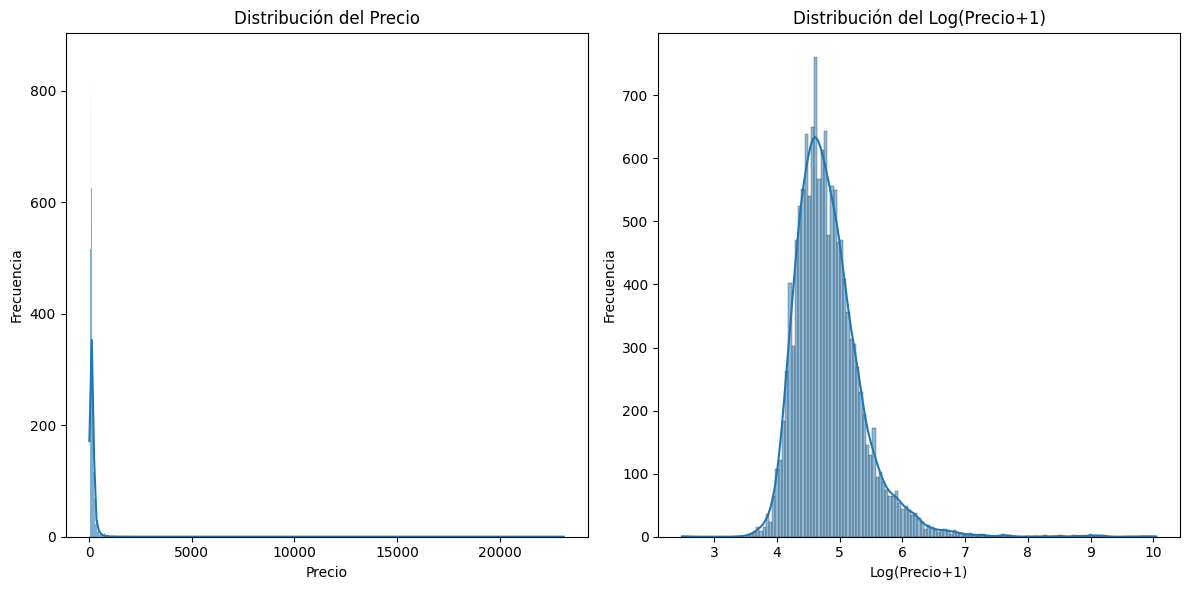

In [149]:
# Visualización de la distribución del precio
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title('Distribución del Precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Aplicamos transformación logarítmica para visualizar mejor
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True)
plt.title('Distribución del Log(Precio+1)')
plt.xlabel('Log(Precio+1)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [150]:
df_numerics_Q1 = df[['price']].apply(lambda x: np.quantile(x,q=.25)) # indicadores de Q1
df_numerics_Q3 = df[['price']].apply(lambda x: np.quantile(x,q=.75)) # indicadores de Q2
df_numerics_IQR = df_numerics_Q3 - df_numerics_Q1 # longitud del IQR
df_numerics_lower = df_numerics_Q1 - 1.5 * df_numerics_IQR # limite inferior
df_numerics_upper = df_numerics_Q3 + 1.5 * df_numerics_IQR # limite superior

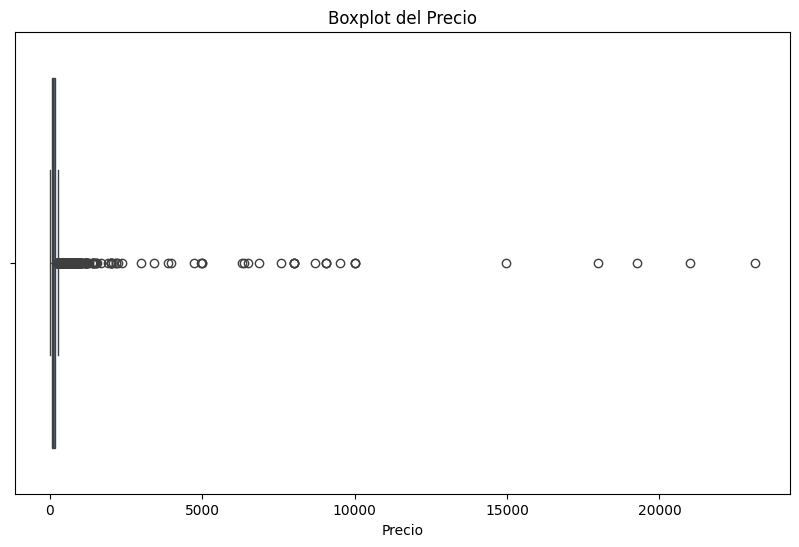

In [151]:
# print(f"Límite inferior para outliers: {df_numerics_lower}")
# print(f"Límite superior para outliers: {df_numerics_upper}")
# print(f"Número de outliers por debajo del límite inferior: {len(df[df['price'] < df_numerics_lower])}")
# print(f"Número de outliers por encima del límite superior: {len(df[df['price'] > df_numerics_upper])}")

# Boxplot del precio
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot del Precio')
plt.xlabel('Precio')
plt.show()

Viendo dichas figuras resulta aún más evidente la existencia de outliers, sobre todo en los mayores precios de los apartamentos.

Para deshacernos de ellos, en el transcurso del presente proyecto se han provado 2 metodologías diferentes:
- Identificar como _outliers_ todos aquellos valores cuyo **_z-score_** absoluto sea **mayor que 3**, es decir, todos aquellos valores que se encuentren más de 3 desviaciones estandar por fuera de la media
- Mediante el método del rango intercuartílico (**IQR**), considerando como _outliers_ todos aquellos valores que se encuentren por debajo de 1,5xIQR del **primer cuartil** y por encima de 1,5xIQR del **tercer cuartil**

Haciendo diferentes pruebas con diferentes modelos, se ha observado con el presente _data-set_ se obtienen mejores resultados utilizando la segunda opción.

In [152]:
df_numerics_over_max = df[['price']].apply(lambda x: x> df_numerics_upper,axis=1)
df_numerics_below_min = df[['price']].apply(lambda x: x< df_numerics_lower,axis=1)

samples_with_outliers_price_pers = df_numerics_below_min.any(axis=1) | df_numerics_over_max.any(axis=1)

df = df[~samples_with_outliers_price_pers]

Comprobamos cómo han quedado los datos después de deshacernos de los _outliers_.

In [153]:
df['price'].describe()

count    12637.000000
mean       120.062990
std         47.736212
min         11.000000
25%         84.000000
50%        109.000000
75%        147.000000
max        271.000000
Name: price, dtype: float64

Observamos que nos hemos deshecho de 995 anuncios (un 7,3% del total del _data-set_). 

Además, parece que el **precio/noche** máximo que aparece ahora tiene mucho más sentido, siendo mayor a la media y al 3er cuartil pero sin que la diferencia sea tan exagerada.

También se observa que, como habíamos pronosticado, la **desviación estandar** es menor a la **media** dado que los **precios/noche** no varian tanto los unos de los otros y siguen una distribución normal.

Veamos los gráficos representados anteriormente.

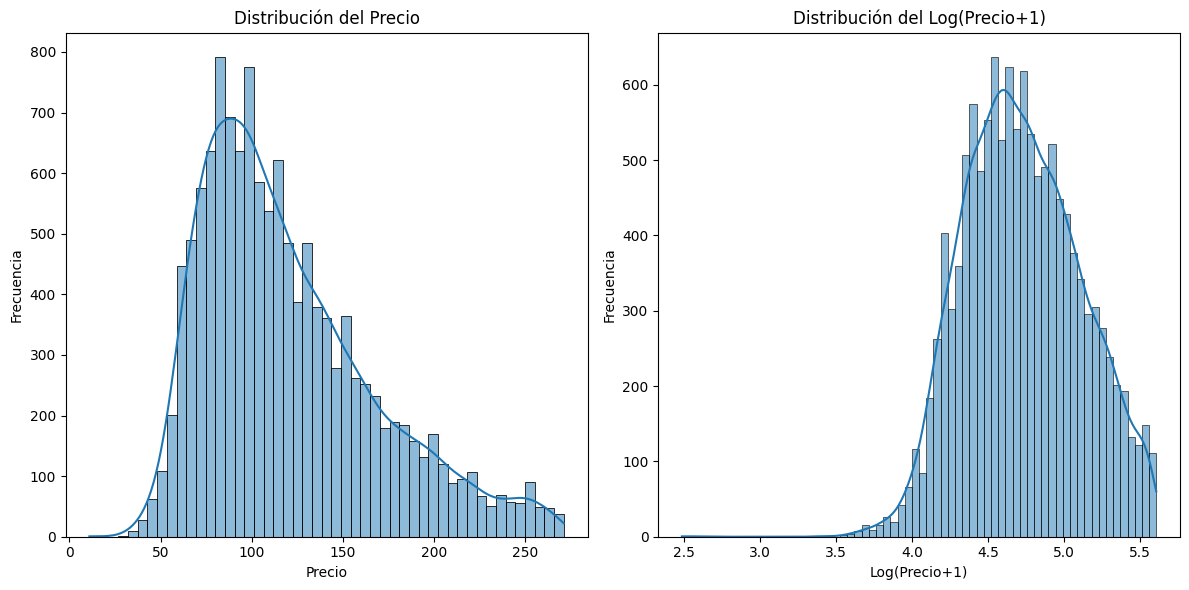

In [154]:
# Visualización de la distribución del precio
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title('Distribución del Precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Aplicamos transformación logarítmica para visualizar mejor
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True)
plt.title('Distribución del Log(Precio+1)')
plt.xlabel('Log(Precio+1)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

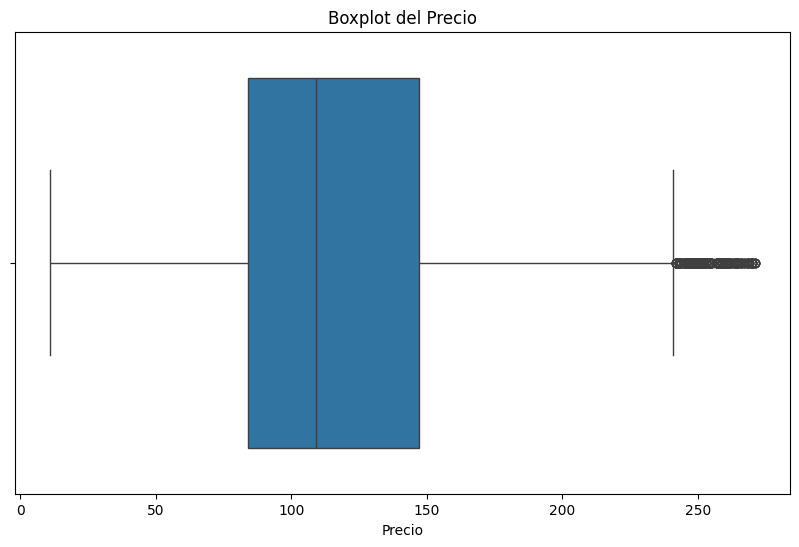

In [155]:
# Boxplot del precio
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot del Precio')
plt.xlabel('Precio')
plt.show()

Vemos que nos hemos deshecho de los _outliers_ que podían desprestigiar los resultados futuros.

Además, vemos un pequeño desplazamiento de la distribución de **precios/noche** hacia la izquierda, los cual nos hace pensar que los precios de los apartamentos tienden a ser más bajos que altos, por lo que se puede suponer en los anuncios de AirBnB se tiende a que sean precios asequibles (teniendo en cuenta el contexto de este mercado en particular) para que puedan acceder a ellos tantas personas como sea posible.

## Análisis de los datos

A continuación, se analizan todos los datos preprocesados y creados anteriormente.

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12637 entries, 5 to 25285
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            12637 non-null  int64  
 1   listing_url                   12637 non-null  object 
 2   neighbourhood_group_cleansed  12637 non-null  object 
 3   latitude                      12637 non-null  float64
 4   longitude                     12637 non-null  float64
 5   accommodates                  12637 non-null  int64  
 6   bathrooms                     12637 non-null  int64  
 7   bedrooms                      12637 non-null  int64  
 8   amenities                     12637 non-null  object 
 9   price                         12637 non-null  float64
 10  neighbourhood_scale           12637 non-null  float64
 11  neighbourhood_num             12637 non-null  int64  
 12  terraza                       12637 non-null  int64  
 13  balcon

### Variables

#### Habitaciones y baños

Estudiemos los datos de **baños** y **habitaciones**.

In [157]:
df.groupby('bedrooms')['price'].describe().T

bedrooms            1            2            3           4           5  \
count     7864.000000  3548.000000  1045.000000  156.000000   17.000000   
mean       102.599949   141.279594   166.669856  190.801282  219.176471   
std         36.246737    47.799148    50.319831   49.959393   54.128591   
min         11.000000    36.000000    50.000000   66.000000   66.000000   
25%         77.000000   104.000000   128.000000  156.000000  195.000000   
50%         96.000000   137.000000   167.000000  195.500000  244.000000   
75%        120.000000   172.000000   205.000000  235.250000  259.000000   
max        270.000000   271.000000   271.000000  271.000000  264.000000   

bedrooms           6      7  
count       6.000000    1.0  
mean      205.166667  238.0  
std        49.219576    NaN  
min       155.000000  238.0  
25%       162.000000  238.0  
50%       199.000000  238.0  
75%       243.500000  238.0  
max       270.000000  238.0

In [158]:
df.groupby('bathrooms')['price'].describe().T

bathrooms             1            2           3           4      5          6
count      10078.000000  2346.000000  189.000000   21.000000    1.0    2.00000
mean         108.470331   162.515772  200.058201  210.333333  244.0  169.00000
std           39.836087    48.183790   43.079365   36.139083    NaN   19.79899
min           11.000000    49.000000   64.000000  151.000000  244.0  155.00000
25%           80.000000   127.000000  170.000000  189.000000  244.0  162.00000
50%          100.000000   159.500000  199.000000  203.000000  244.0  169.00000
75%          129.000000   197.000000  240.000000  249.000000  244.0  176.00000
max          271.000000   271.000000  271.000000  264.000000  244.0  183.00000

Viendo los estadísticos anteriores, vemos que en la grandísima mayoría de los apartamentos hay 1 baño y 1 habitación. 

A la vez se observa que, aunque en la mayoría de los casos hay 1 ud de cada uno, es más normal que haya viviendas con varias habitaciones mientras que tienden a tener menos baños, como es lógico.

También se puede llegar a la conclusión de que, el hecho de estar estudiando una ciudad como Madrid, al ser la gran mayoría apartamentos en pisos, tienden a ser viviendas más pequeñas con menos habitaciones y menos baños de los que podrían haber en barrios residenciales en los extraradios de las ciudades. 

Además, una de la hipótesis plausibles es que, a la hora de sacar rentabilidad ofertando una vivienda por AirBnB, no sea muy rentable arrendar por este tipo de plataformas casas demasiado grandes al tratarse de una plataforma utilizada por personas con rentas medias o por lo menos no demasiado grandes. Entendemos que existen otras plataformas para ese tipo de público.

Representemos estos datos en algunos gráficos:

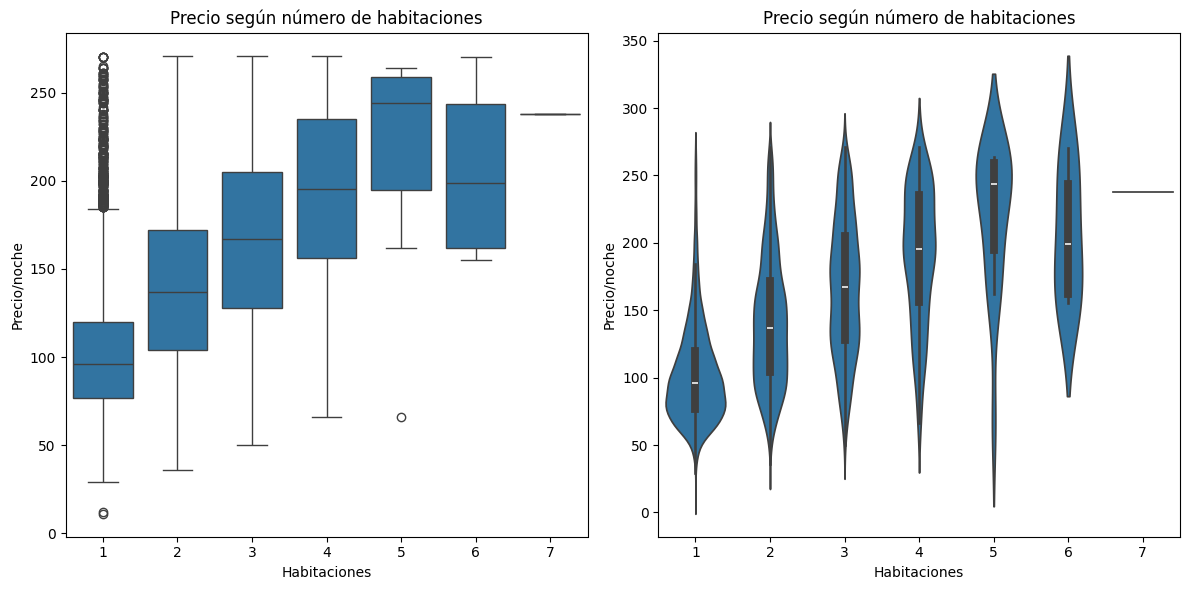

In [159]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Precio según número de habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Precio/noche')

plt.subplot(1, 2, 2)
sns.violinplot(x='bedrooms', y='price', data=df)
plt.title('Precio según número de habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Precio/noche')

plt.tight_layout()
plt.show()

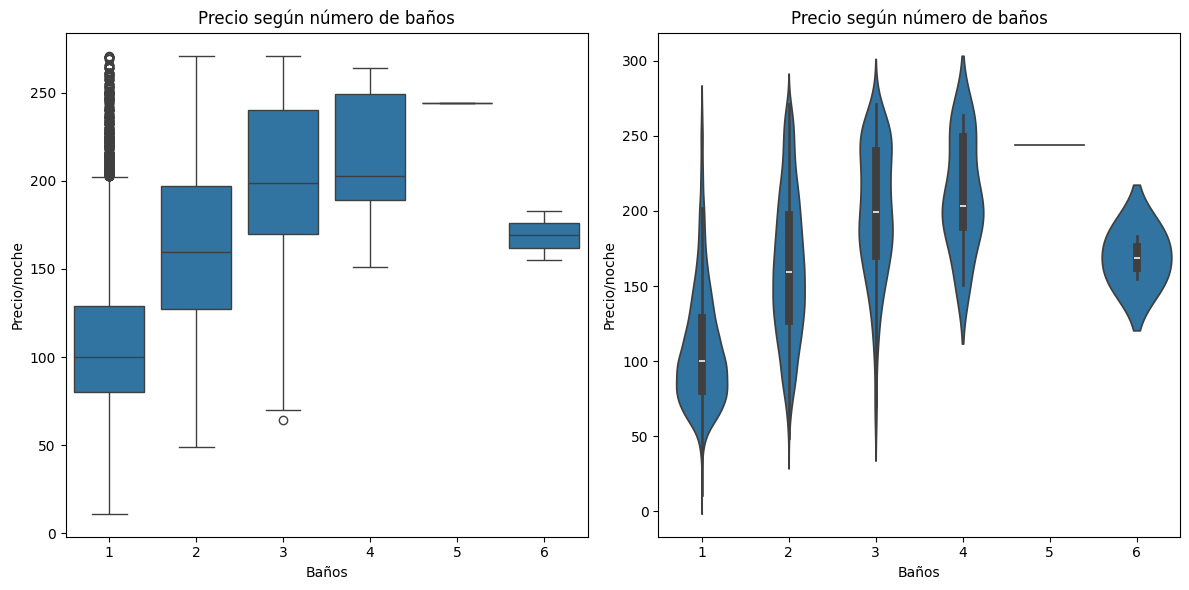

In [160]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='bathrooms', y='price', data=df)
plt.title('Precio según número de baños')
plt.xlabel('Baños')
plt.ylabel('Precio/noche')

plt.subplot(1, 2, 2)
sns.violinplot(x='bathrooms', y='price', data=df)
plt.title('Precio según número de baños')
plt.xlabel('Baños')
plt.ylabel('Precio/noche')

plt.tight_layout()
plt.show()

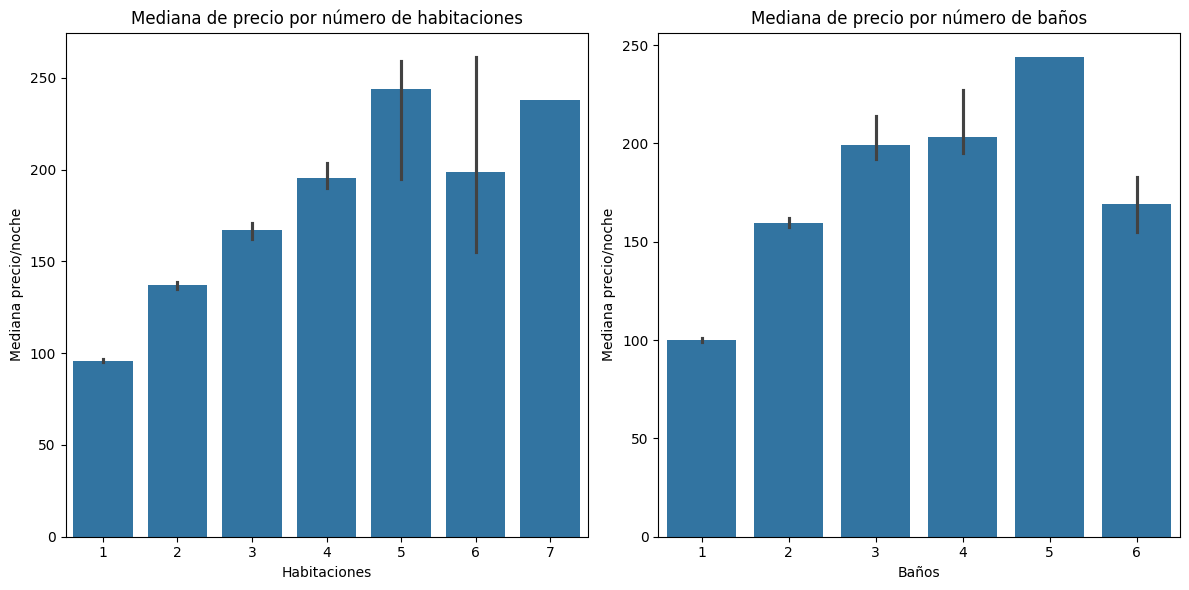

In [161]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='bedrooms', y='price', data=df, estimator='median')
plt.title('Mediana de precio por número de habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Mediana precio/noche')

plt.subplot(1, 2, 2)
sns.barplot(x='bathrooms', y='price', data=df, estimator='median')
plt.title('Mediana de precio por número de baños')
plt.xlabel('Baños')
plt.ylabel('Mediana precio/noche')

plt.tight_layout()
plt.show()

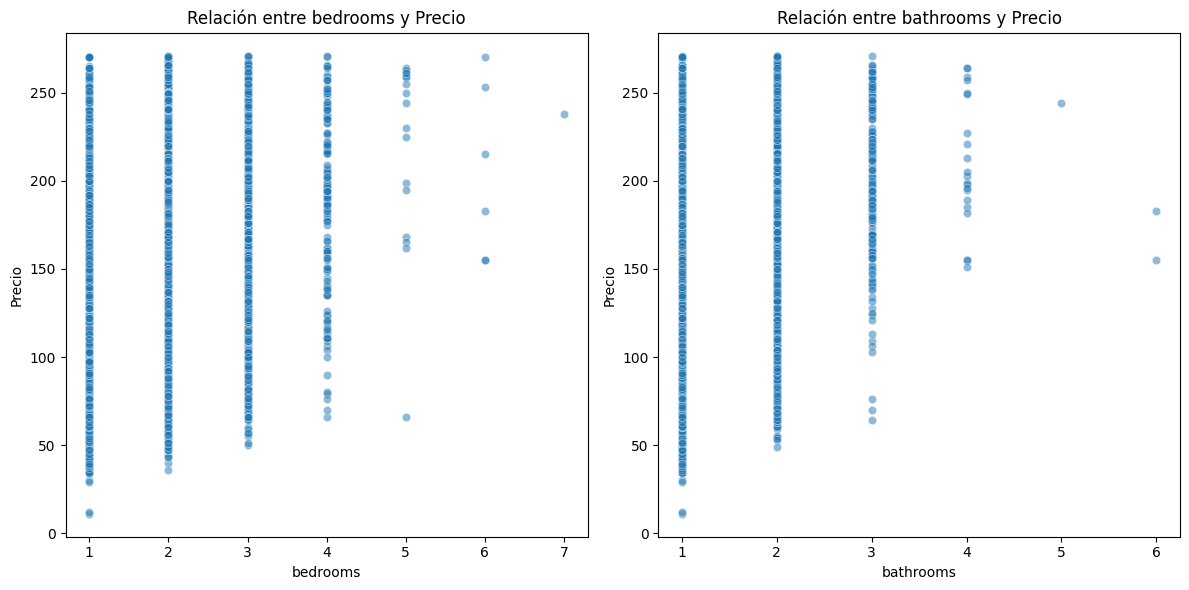

In [162]:
numeric_vars = ['bedrooms', 'bathrooms']
# Relación entre variables numéricas y precio
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

for i, var in enumerate(numeric_vars):
    sns.scatterplot(x=var, y='price', data=df, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Relación entre {var} y Precio')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Precio')

plt.tight_layout()
plt.show()

En las figuras anteriores lo que se ve es, a parte de lo comentado anteriormente después de estudiar lo estadísticos de las presentes variables, que lógicamente el precio mínimo tiende a ser mayor cuantas más habitaciones y más baños tengan los apartamentos. Además, la variabilidad de precios tiende a ser menor cuanto mayor sea la cantidad tanto de habitaciones como de baños, habiendo una gran variabilidad de precios en aquellos apartamentos que solo cuentan con 1 ud de cada uno.

#### Terrazas

Estudiemos la existencia o no de **terrazas**.

In [163]:
# Estadísticas descriptivas de variables booleanas

print("Estadísticas descriptivas de variables numéricas:")
df.groupby('terraza')['price'].describe().T

Estadísticas descriptivas de variables numéricas:


terraza             0           1
count    11677.000000  960.000000
mean       119.364220  128.562500
std         47.691214   47.488325
min         11.000000   39.000000
25%         83.000000   90.000000
50%        108.000000  118.500000
75%        145.000000  160.000000
max        271.000000  271.000000

A partir de los estadísticos básicos, observamos que, efectivamente, aquellos apartamentos que cuentas con terraza tienden a ser más caros (se observa tanto en la media como en los precios mínimos y los cuartiles). Pero a la vez hay bastantes más apartamentos sin terraza que con terraza (lo cual es lógico que ocurra en grandes ciudades).

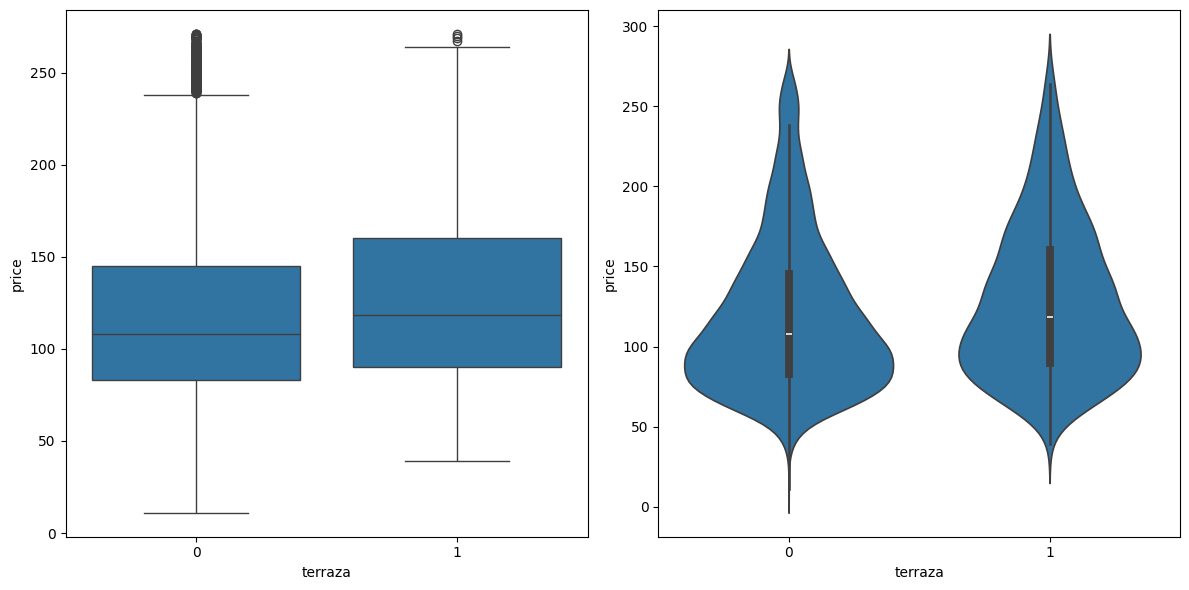

In [164]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

sns.boxplot(x='terraza', y='price', data=df, ax=axes[0])
sns.violinplot(x='terraza', y='price', data=df, ax=axes[1])

plt.tight_layout()
plt.show()

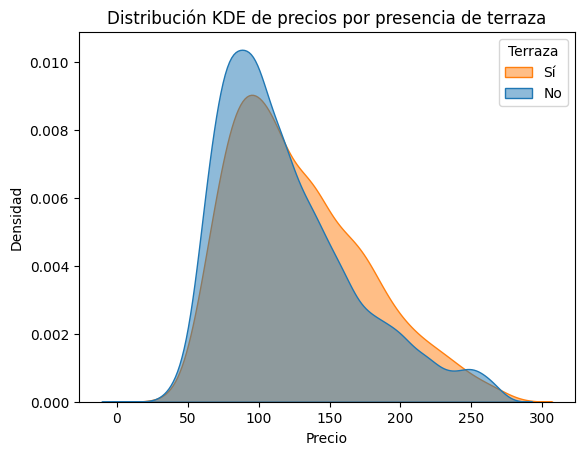

In [165]:
sns.kdeplot(data=df, x='price', hue='terraza', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribución KDE de precios por presencia de terraza')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend(title='Terraza', labels=['Sí', 'No'])
plt.show()

Después de ver las figuras anteriores, se llega a las mismas conclusiones que con los estadísitcos, habiendo una mayor densidad de apartamentos sin terraza en los rangos de precios más bajos y mayor densidad de apartamentos con terraza en rangos de precios más altos. 

También se ve viendo el gráfico con las densidades que cuando los rangos de precios están en los límites superiores, no parece que el precio esté tan influenciado por la existencia de terraza. O por lo menos no se cumple la teoría de que la existencia de terraza siempre aumente el precio.

#### Balcones

Estudiemos la existencia o no de **balcones**.

In [166]:
# Estadísticas descriptivas de variables booleanas

print("Estadísticas descriptivas de variables booleanas:")
df.groupby('balcon')['price'].describe().T

Estadísticas descriptivas de variables booleanas:


balcon             0           1
count   11890.000000  747.000000
mean      118.975357  137.374833
std        47.285040   51.440054
min        11.000000   40.000000
25%        83.000000   96.500000
50%       108.000000  130.000000
75%       145.000000  168.500000
max       271.000000  270.000000

Observando los estadísticos, se observa lo mismo que en el caso de las terrazas, tendiendo a ser más caros aquellos apartamentos con balcón que aquellos sin balcón. Y que hay bastantes más apartamentos con que sin balcón.

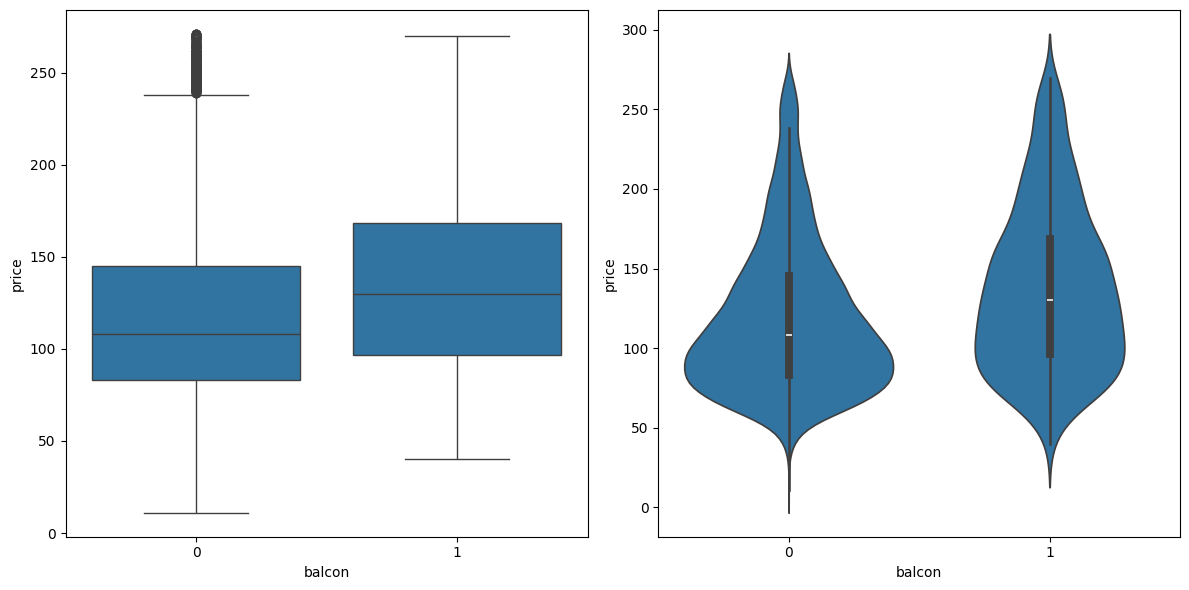

In [167]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

sns.boxplot(x='balcon', y='price', data=df, ax=axes[0])
sns.violinplot(x='balcon', y='price', data=df, ax=axes[1])

plt.tight_layout()
plt.show()

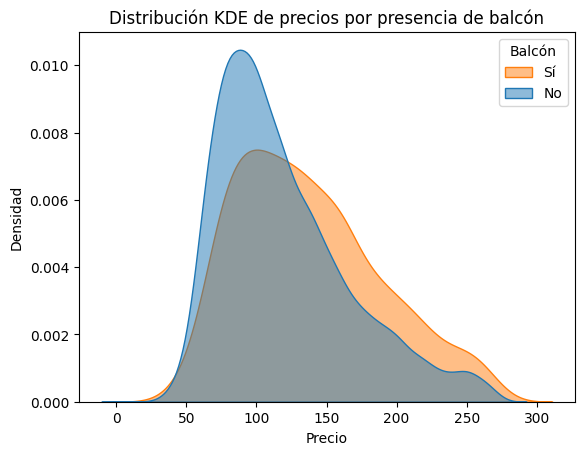

In [168]:
sns.kdeplot(data=df, x='price', hue='balcon', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribución KDE de precios por presencia de balcón')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend(title='Balcón', labels=['Sí', 'No'])
plt.show()

Mirando las figuras, es mucho más evidente la influencia del que tenga o no balcón el apartamento. De esta forma, hay mucha más densidad e balcones en aqullos apartamentos cuyos precios son menores y hay bastantes más apartamentos con balcón en los tramos de precios mayores.

Esto, en comparación con la existencia de terrazas, nos hace pensar que los balcones tienen una mayor influencia en el precio por noche de los apartamentos que las terrazas.

#### Jardines

Estudiemos la influencia de la existencia o no de **jardines** en los precios de los apartamentos.

In [169]:
# Estadísticas descriptivas de variables booleanas

print("Estadísticas descriptivas de variables booleanas:")
df.groupby('jardin')['price'].describe().T

Estadísticas descriptivas de variables booleanas:


jardin             0           1
count   12403.000000  234.000000
mean      120.064178  120.000000
std        47.663878   51.534729
min        11.000000   40.000000
25%        84.000000   81.000000
50%       109.000000  104.500000
75%       147.000000  144.750000
max       271.000000  264.000000

En este caso parere como que aquellas viviendas donde hay jardines, los precios sean mínimamente menores a los apartamentos que no tienen jardines.

Este suceso se puede explicar por el hecho de que, al estar estudiando las viviendas de una ciudad como Madrid, aquellos apartamentos que cuenten con jardón lo más seguro es que se encuentren a las afueras. Por lo que el precio puede ser que aumente por la existencia de jardín, pero que a la vez este disminuya por su localización poco favorable para acceder al centro de la ciudad.

Además, hay muy pocos apartamentos con jardín en comparación con los que no tienen ya que es muy difícil que las viviendas en el centro de grandes ciudades cuenten con jardín.

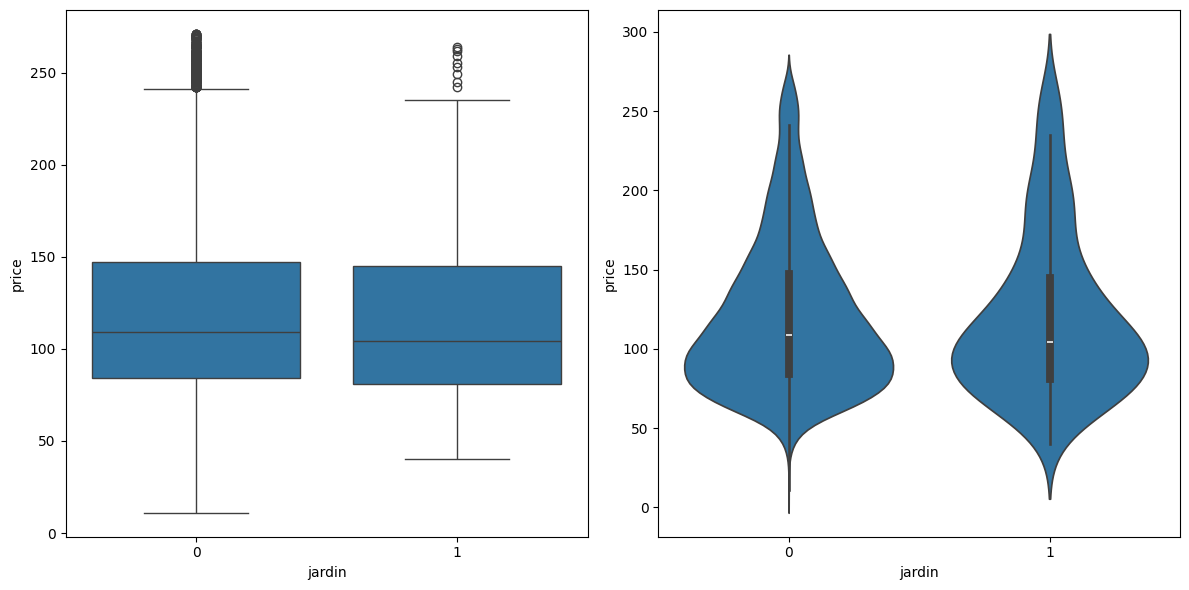

In [170]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

sns.boxplot(x='jardin', y='price', data=df, ax=axes[0])
sns.violinplot(x='jardin', y='price', data=df, ax=axes[1])

plt.tight_layout()
plt.show()

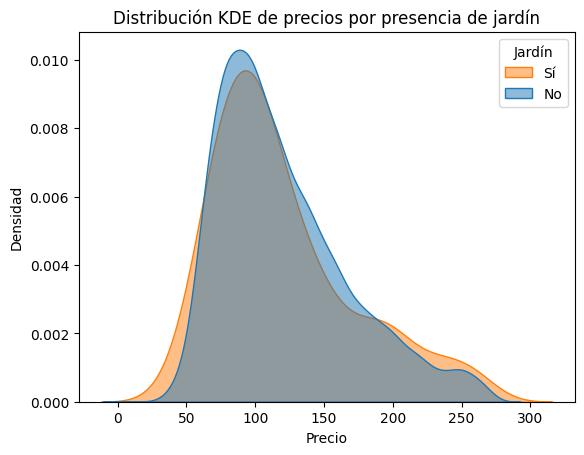

In [171]:
sns.kdeplot(data=df, x='price', hue='jardin', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribución KDE de precios por presencia de jardín')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend(title='Jardín', labels=['Sí', 'No'])
plt.show()

La visualización de las figuras anteriores refuerza nuestra hipótesis.

Por todo ello, lo más seguro es que no tenga sentido añadir esta variable para el entrenamiento del modelo. Por un lado, porque la gran mayoría de las viviendas no cuentan con jardín. Y por otro, porque el hecho de tener jardín no parece que afecte tanto al precio/noche de las viviendas como puede afectar la localización de estas.

#### Calefacción

Estudiemos la influencia de la existencia o no de **calefacción** en el precio de las viviendas.

In [172]:
# Estadísticas descriptivas de variables booleanas

print("Estadísticas descriptivas de variables booleanas:")
df.groupby('calefaccion')['price'].describe().T

Estadísticas descriptivas de variables booleanas:


calefaccion           0            1
count        1739.00000  10898.00000
mean          106.06498    122.29666
std            43.66826     47.97916
min            29.00000     11.00000
25%            74.00000     86.00000
50%            95.00000    111.00000
75%           128.50000    149.00000
max           271.00000    271.00000

En este caso, se puede observar que hay muchos más apartamentos que cuentan con calefacción. Además, en este caso sí que se ve un relación directa entre la existencia de calefacción con que los apartamentos tengan precios superiores (observando tanto la media como los diferentes cuartiles y el precio mínimos).

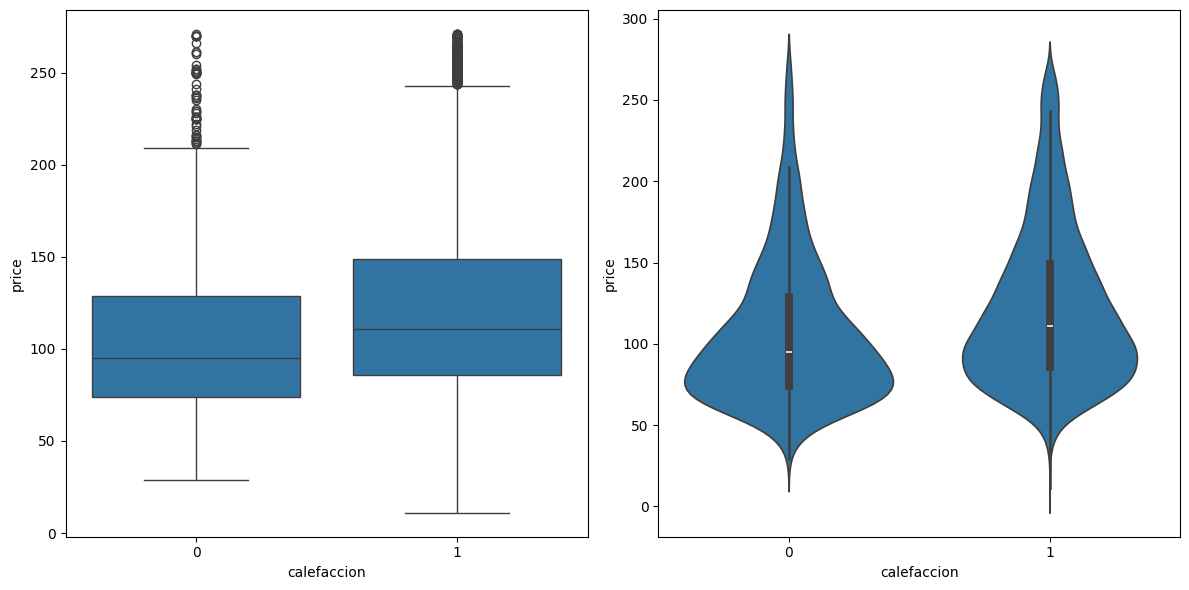

In [173]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

sns.boxplot(x='calefaccion', y='price', data=df, ax=axes[0])
sns.violinplot(x='calefaccion', y='price', data=df, ax=axes[1])

plt.tight_layout()
plt.show()

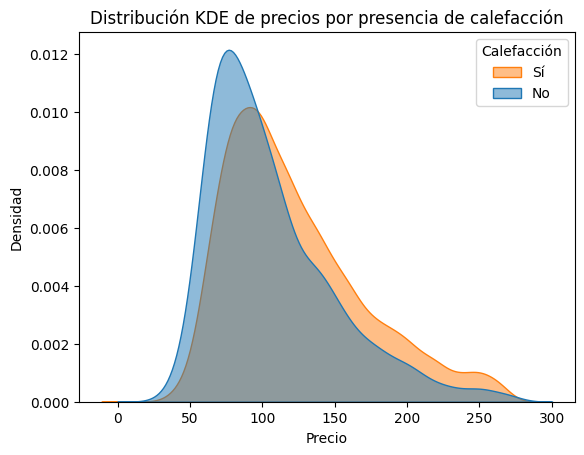

In [174]:
sns.kdeplot(data=df, x='price', hue='calefaccion', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribución KDE de precios por presencia de calefacción')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend(title='Calefacción', labels=['Sí', 'No'])
plt.show()

En las figuras se puede ver lo mismo que en los estadísticos.

En conlusión, sí que parece que tenga una relación directa el que la vivienda tenga calefacción con que el precio sea mayor. Sin embargo, el hecho de que la mayoría de los apartamentos tengan calefacción puede suponerque esta variable no tenga mucho peso a la hora de predecir precios/noche de nuevas viviendas.

#### Piscina

Estudiemos la influencia de la existencia o no de **piscina** en el precio de las viviendas.

In [175]:
# Estadísticas descriptivas de variables booleanas

print("Estadísticas descriptivas de variables booleanas:")
df.groupby('pool')['price'].describe().T

Estadísticas descriptivas de variables booleanas:


pool              0           1
count  12108.000000  529.000000
mean     119.854642  124.831758
std       47.590249   50.777292
min       11.000000   36.000000
25%       84.000000   85.000000
50%      109.000000  110.000000
75%      146.000000  156.000000
max      271.000000  270.000000

Se observa, por un lado, que la gran mayoría de las viviendas no cuentan con piscina (seguramente porque no es normal tener piscina en el centro de las ciudades) y, por otro lado, que el precio tiende a aumentar en aquellas viviendas que cuentan con piscinal.

Aunque en este caso se podría aplicar la misma lógica que con los **jardines**, sí que parece que el hecho de que una vivienda cuente con piscina, aunque este se encuentre alejada del centro, el precio puede aumentar. Puede tener lógica al ser una comodidad que se suele buscar en los destinos vacacionales, al contrario que el jardín.

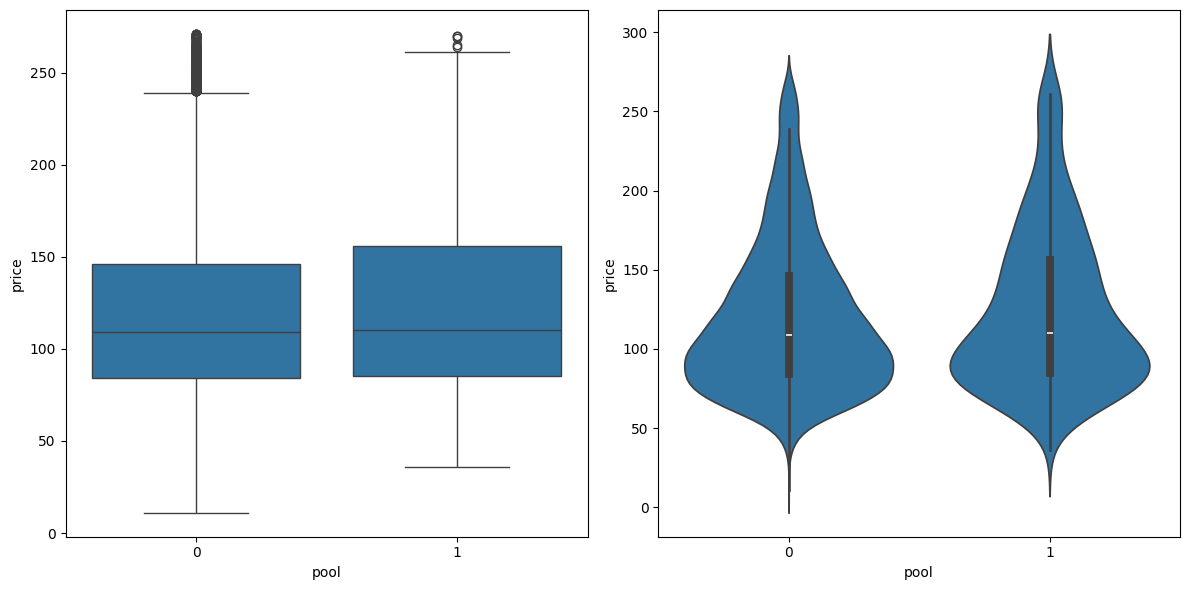

In [176]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

sns.boxplot(x='pool', y='price', data=df, ax=axes[0])
sns.violinplot(x='pool', y='price', data=df, ax=axes[1])

plt.tight_layout()
plt.show()

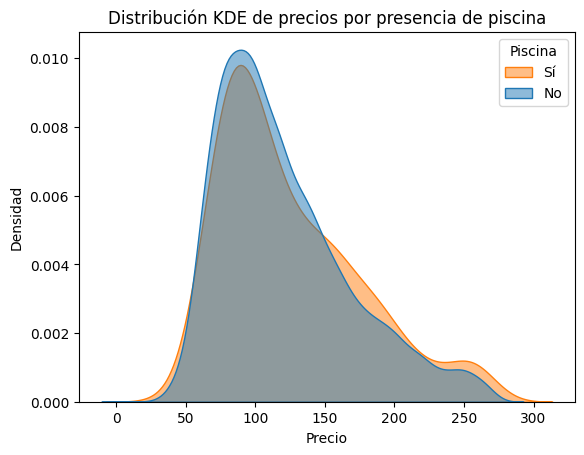

In [177]:
sns.kdeplot(data=df, x='price', hue='pool', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribución KDE de precios por presencia de piscina')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend(title='Piscina', labels=['Sí', 'No'])
plt.show()

Viendo los gráficos, se llega a las mismas conclusiones que viendo los estadísticos.

Esta variable puede tener algo de relevancia a la hora de predecir los precios. Sin embargo, el hecho de que la gran mayoría de las viviendas no tengan piscina hace que no sea una variable tan valiosa para resolver el problema que nos atañe.

#### Garaje

Estudiemos la relevancia que tiene la existencia o no de **garaje** en el precio de una vivienda.

In [178]:
# Estadísticas descriptivas de variables booleanas

print("Estadísticas descriptivas de variables booleanas:")
df.groupby('garaje')['price'].describe().T

Estadísticas descriptivas de variables booleanas:


garaje             0           1
count   12011.000000  626.000000
mean      120.213138  117.182109
std        47.474646   52.461418
min        11.000000   30.000000
25%        84.000000   79.000000
50%       109.000000  102.000000
75%       147.000000  141.000000
max       271.000000  270.000000

Se observa, en primer lugar, que la gran mayoría de los apartamentos no cuentan con garaje. Además, no es tan obvio que el precio de las viviendas tienda a aumentar con la existencia de garaje.

Esto puede explicarse por el hecho de que la gran mayoría de las personas que buscan apartamentos temporales en la ciudad de Madrid mediante plataformas como AirBnB, suelen ser por motivos turísiticos e intentan no ir en coche para utilizar el transporte público para moverse por dentro de la ciudad. Esta hipótesis podremos comprobarla cuando estudiemos más adelante la relevancia que tiene la cercanía de los apartamentos a paradas de diferentes medios de transporte público.

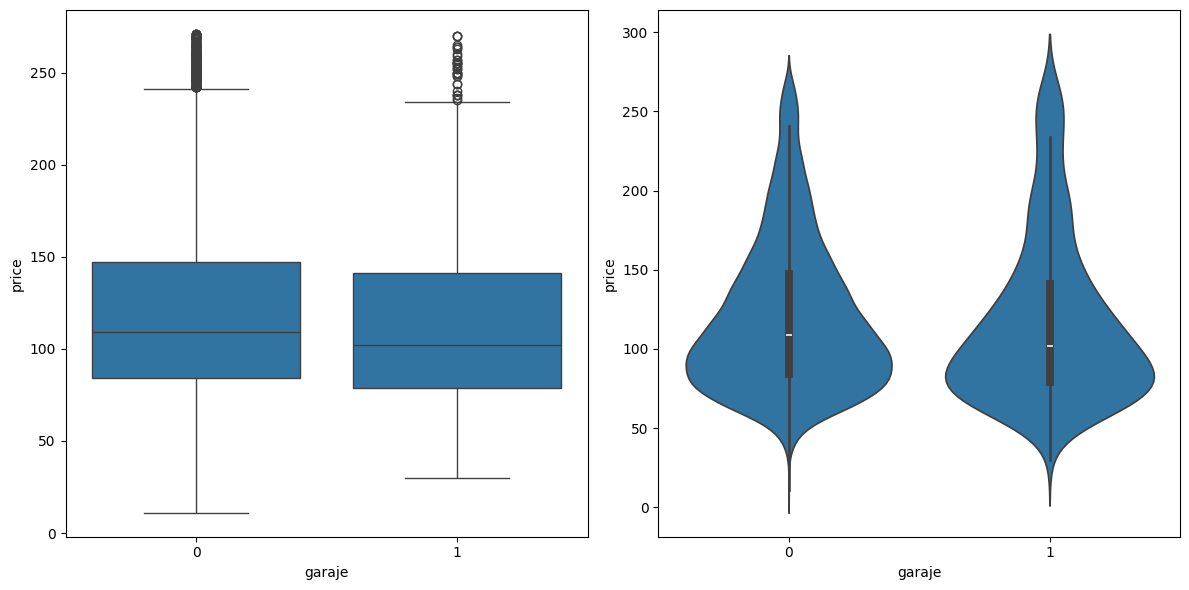

In [179]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

sns.boxplot(x='garaje', y='price', data=df, ax=axes[0])
sns.violinplot(x='garaje', y='price', data=df, ax=axes[1])

plt.tight_layout()
plt.show()

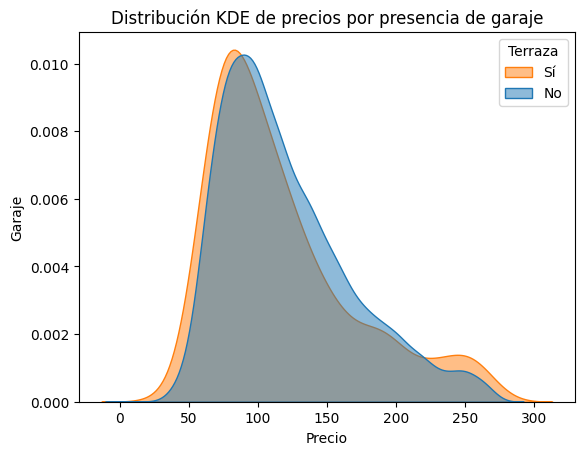

In [180]:
sns.kdeplot(data=df, x='price', hue='garaje', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribución KDE de precios por presencia de garaje')
plt.xlabel('Precio')
plt.ylabel('Garaje')
plt.legend(title='Terraza', labels=['Sí', 'No'])
plt.show()

Observando los gráficos, llegamos a las mismas conclusiones que con los estadísiticos.

Esto nos hace pensar que es muy posible que esta variable no sea de gran utilidad para la predicción de **precio/noche**.

#### Aire acondicionado

Estudiemos la relevancia que puede tener la existencia o no de **aire acondicionado** para predecir el precio de los apartamentos.

In [181]:
# Estadísticas descriptivas de variables booleanas

print("Estadísticas descriptivas de variables booleanas:")
df.groupby('aire_acondicionado')['price'].describe().T

Estadísticas descriptivas de variables booleanas:


aire_acondicionado            0            1
count               3413.000000  9224.000000
mean                 110.970993   123.427147
std                   44.276376    48.526852
min                   34.000000    11.000000
25%                   79.000000    86.000000
50%                  100.000000   113.000000
75%                  131.000000   151.000000
max                  270.000000   271.000000

Obsservando los estadísiticos, nos encontramos con un comportamiento muy parecido al que veíamos con la variable de **calefacción**. La mayoría de los apartamentos cuentan con aire acondicionado y el precio tiende a ser mayor en los casos en los que se cuenta con esta comodidad.

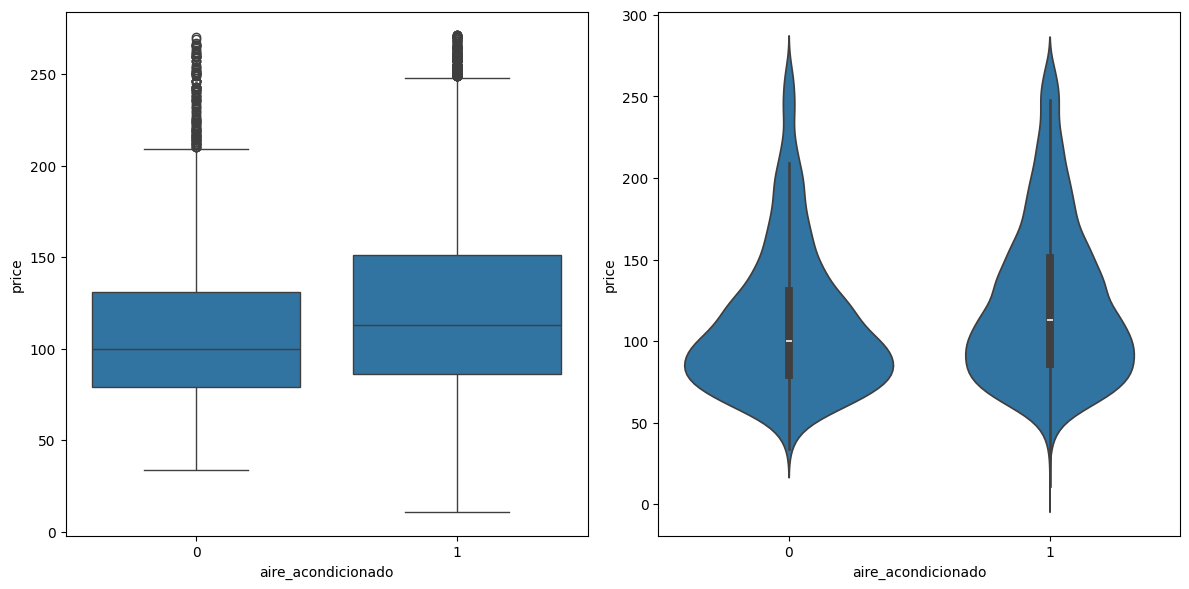

In [182]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

sns.boxplot(x='aire_acondicionado', y='price', data=df, ax=axes[0])
sns.violinplot(x='aire_acondicionado', y='price', data=df, ax=axes[1])

plt.tight_layout()
plt.show()

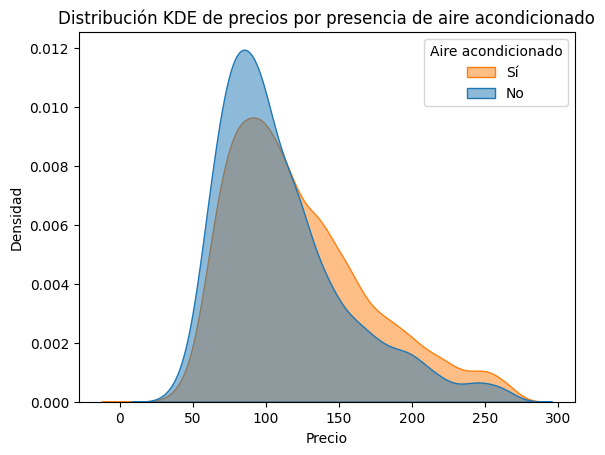

In [183]:
sns.kdeplot(data=df, x='price', hue='aire_acondicionado', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribución KDE de precios por presencia de aire acondicionado')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend(title='Aire acondicionado', labels=['Sí', 'No'])
plt.show()

Viendo los gráficos, llegamos a las mismas conclusiones que con los estadísticos. 

Seguramente esta variable tenga relación con el precio/noche de las viviendas. Sin embargo, el hecho de que la mayoría cuente con aire acondicionado hace pensar que puede no tener tanta importancia.

#### Ascensor

Estudiemos la variable de **ascensor**.

In [184]:
# Estadísticas descriptivas de variables booleanas

print("Estadísticas descriptivas de variables booleanas:")
df.groupby('ascensor')['price'].describe().T

Estadísticas descriptivas de variables booleanas:


ascensor            0            1
count     6634.000000  6003.000000
mean       110.605517   130.514576
std         44.543121    48.955528
min         11.000000    30.000000
25%         78.000000    93.500000
50%         99.000000   120.000000
75%        133.000000   159.500000
max        271.000000   271.000000

En este caso, prácticamente las viviendas se reparten 50/50 entre los apartamentos que tienen ascensor y los que no, lo cual es positivo dado que nos dará mucha información sosbre cómo afecta esta variable en el precio/noche.

También es posible observar que, como es normal, aquellos apartamentos que cuentan con ascensor tienden a ser más caros que los que no. 

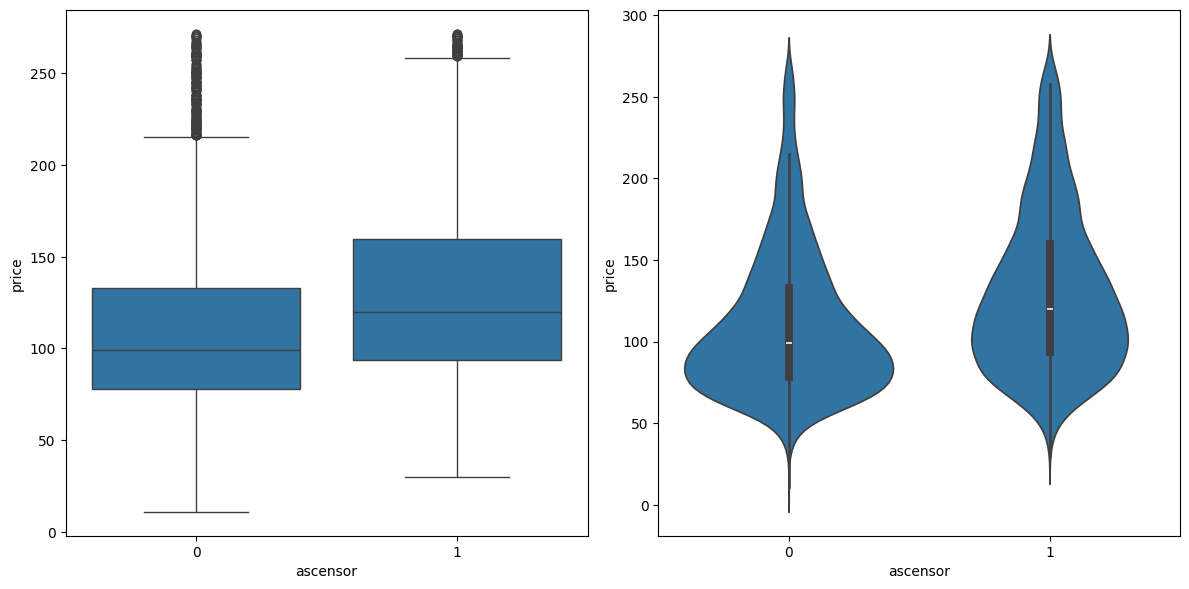

In [185]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

sns.boxplot(x='ascensor', y='price', data=df, ax=axes[0])
sns.violinplot(x='ascensor', y='price', data=df, ax=axes[1])

plt.tight_layout()
plt.show()

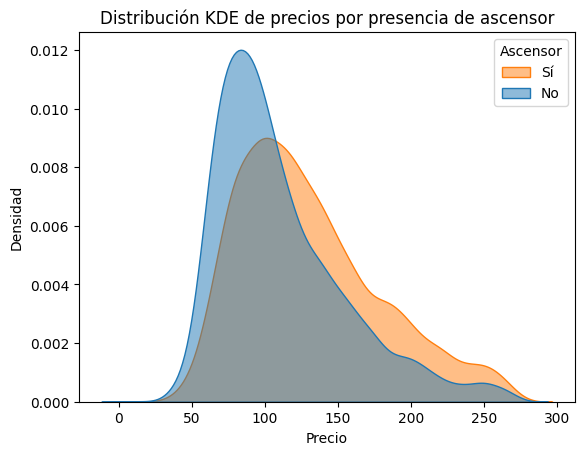

In [186]:
sns.kdeplot(data=df, x='price', hue='ascensor', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribución KDE de precios por presencia de ascensor')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend(title='Ascensor', labels=['Sí', 'No'])
plt.show()

En los gráficos se llega a la misma conclusión que con los estadísticos, haciendo entender que este será un factor de valor a la hora de predecir el precio/noche de las viviendas.

#### Movilidad reducida

Estudiemos cómo afecta el que la vivienda cuente o no con instalaciones para personas con **movilidad reducida** al **precio/noche** de las viviendas.

In [187]:
# Estadísticas descriptivas de variables booleanas

print("Estadísticas descriptivas de variables booleanas:")
df.groupby('movilidad_reducida')['price'].describe().T

Estadísticas descriptivas de variables booleanas:


movilidad_reducida             0           1
count               11807.000000  830.000000
mean                  119.156009  132.965060
std                    47.159429   53.689834
min                    11.000000   30.000000
25%                    83.000000   92.000000
50%                   108.000000  118.000000
75%                   145.000000  166.000000
max                   271.000000  271.000000

En este caso, como ocurre en casos anteriores, la gran mayoría de los apartamentos no cuentan con instalaciones para personas con movilidad reducida. Y aunque es cierto que se ve la tendencia de los precios/noche de los apartamentos a ser mayor en aquellos que sí cuentan con dichas instalaciones, la "mala distribución" de estos datos hace pensar que no se trata de una variable que vaya a tener mucho peso en la predicción de precios/noche de los apartamentos.

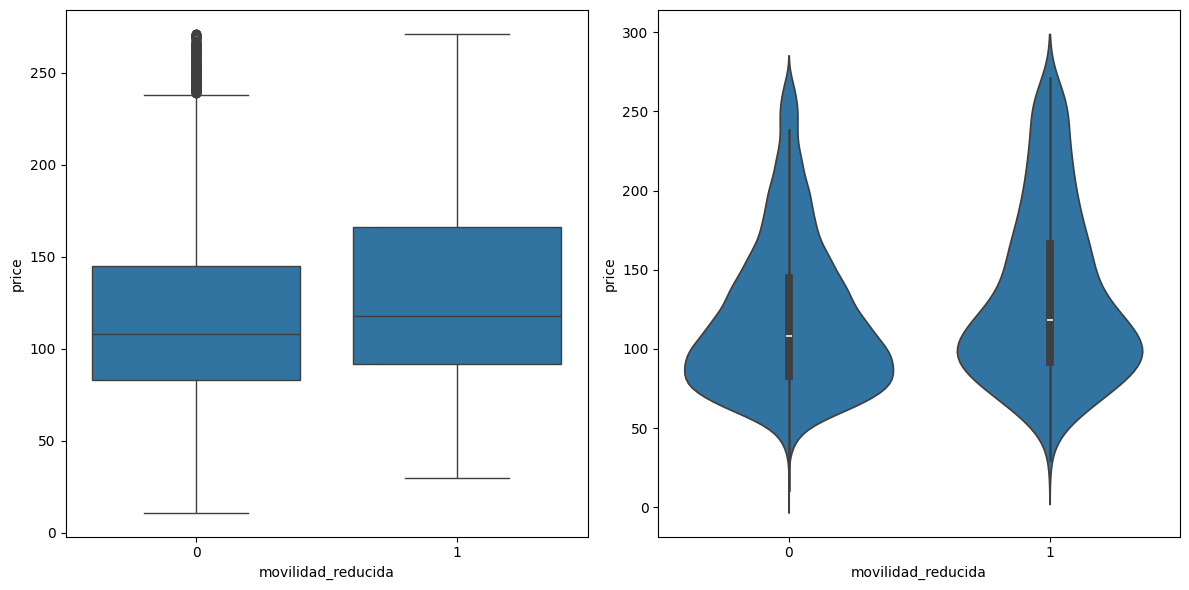

In [188]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

sns.boxplot(x='movilidad_reducida', y='price', data=df, ax=axes[0])
sns.violinplot(x='movilidad_reducida', y='price', data=df, ax=axes[1])

plt.tight_layout()
plt.show()

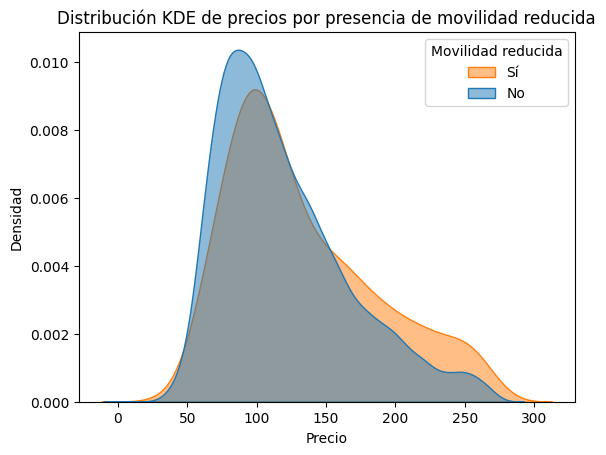

In [189]:
sns.kdeplot(data=df, x='price', hue='movilidad_reducida', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribución KDE de precios por presencia de movilidad reducida')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend(title='Movilidad reducida', labels=['Sí', 'No'])
plt.show()

En los gráficos que se aprecia que, efectivamente, aquellos apartamentos que cuentan con instalaciones para personas con movilidad reducida tienden a tener precios mayores.

Pero, como hemos dicho anteriormente, el hecho de que la gran mayoría de los apartamentos no cuenten con estas instalaciones nos adelanta el hecho de que esta variable no vaya a tener mucho peso en la predicción de precio/noche de los apartamentos.

#### Distritos

Estudiemos cómo afecta el hecho de que los apartamentos puedan estar en un distrito u otro de la ciudad.

Distribución de neighbourhood_group_cleansed:
neighbourhood_group_cleansed
Centro                   5949
Tetuán                    931
Salamanca                 910
Chamberí                  814
Arganzuela                662
Retiro                    482
Chamartín                 456
Carabanchel               353
Ciudad Lineal             316
Puente de Vallecas        298
Moncloa - Aravaca         257
Latina                    231
Hortaleza                 230
Usera                     218
San Blas - Canillejas     199
Fuencarral - El Pardo     121
Villaverde                 72
Barajas                    48
Villa de Vallecas          39
Moratalaz                  32
Vicálvaro                  19
Name: count, dtype: int64


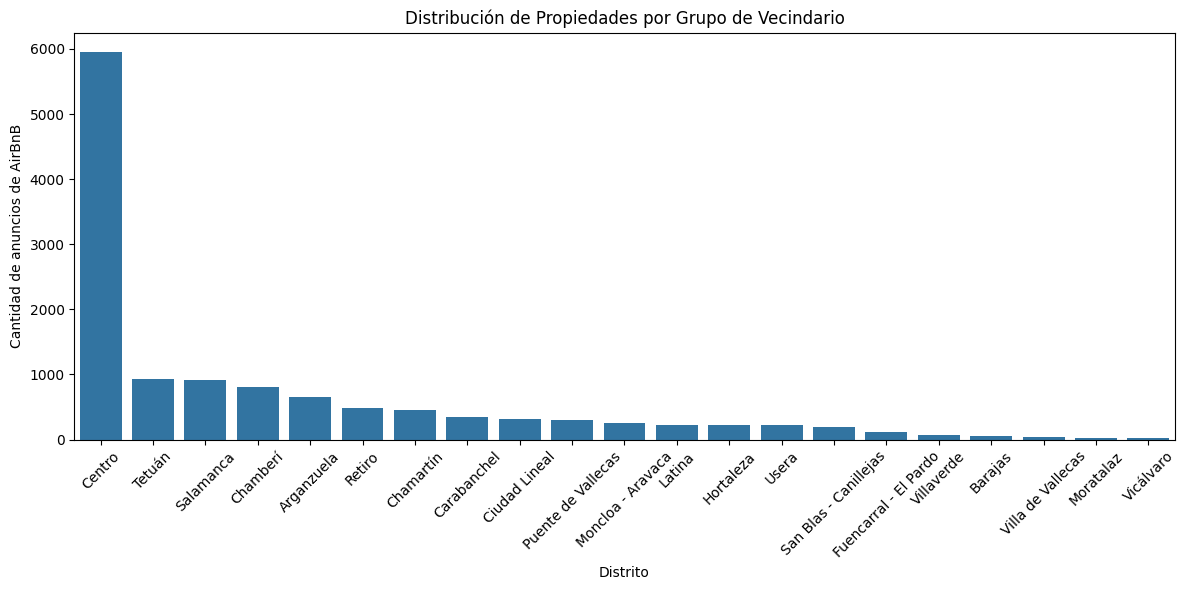

In [190]:
# Análisis de neighbourhood_group_cleansed
print("Distribución de neighbourhood_group_cleansed:")
neighbourhood_counts = df['neighbourhood_group_cleansed'].value_counts()
print(neighbourhood_counts)

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(x=neighbourhood_counts.index, y=neighbourhood_counts.values)
plt.title('Distribución de Propiedades por Grupo de Vecindario')
plt.xlabel('Distrito')
plt.ylabel('Cantidad de anuncios de AirBnB')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se observa que la gran mayoría de los apartamentos se encuentra en el distrito Centro. Esto puede tener sentido si pensamos que los propietarios buscan ofertar sobre todo apartamentos en el centro de la ciudad al seguramente tener una mayor ocupación que en el resto de distritos.

In [191]:
# Precio promedio por neighbourhood_group_cleansed
price_by_neighbourhood = df.groupby('neighbourhood_group_cleansed')['price'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
print("Precio por distrito:")
price_by_neighbourhood

Precio por distrito:


mean  median  count
neighbourhood_group_cleansed                           
Salamanca                     139.867033   130.0    910
Chamberí                      134.022113   126.0    814
Moncloa - Aravaca             128.727626   119.0    257
Retiro                        128.211618   116.0    482
Centro                        125.994285   116.0   5949
Chamartín                     120.046053   113.5    456
Arganzuela                    110.533233   100.0    662
Tetuán                        106.065521    98.0    931
Hortaleza                     105.595652    96.5    230
Moratalaz                      99.375000    87.0     32
Fuencarral - El Pardo          99.140496    86.0    121
Vicálvaro                      99.000000    89.0     19
Carabanchel                    98.461756    89.0    353
Ciudad Lineal                  96.810127    84.0    316
Barajas                        96.770833    85.5     48
San Blas - Canillejas          95.376884    83.0    199
Latina                         95.225108    89.0    231
Villaverde                     93.500000    90.0     72
Puente de Vallecas             92.516779    86.0    298
Usera                          90.481651    78.0    218
Villa de Vallecas              88.179487    80.0     39

En cuanto al precio/noche medio por distrito, vemos que ordenados de mayor a menor, tiene el orden anterior. Esto lo compararemos más adelante con las rentas netas medias por hogar de cada distrito a ver si pudieran tener alguna relación.

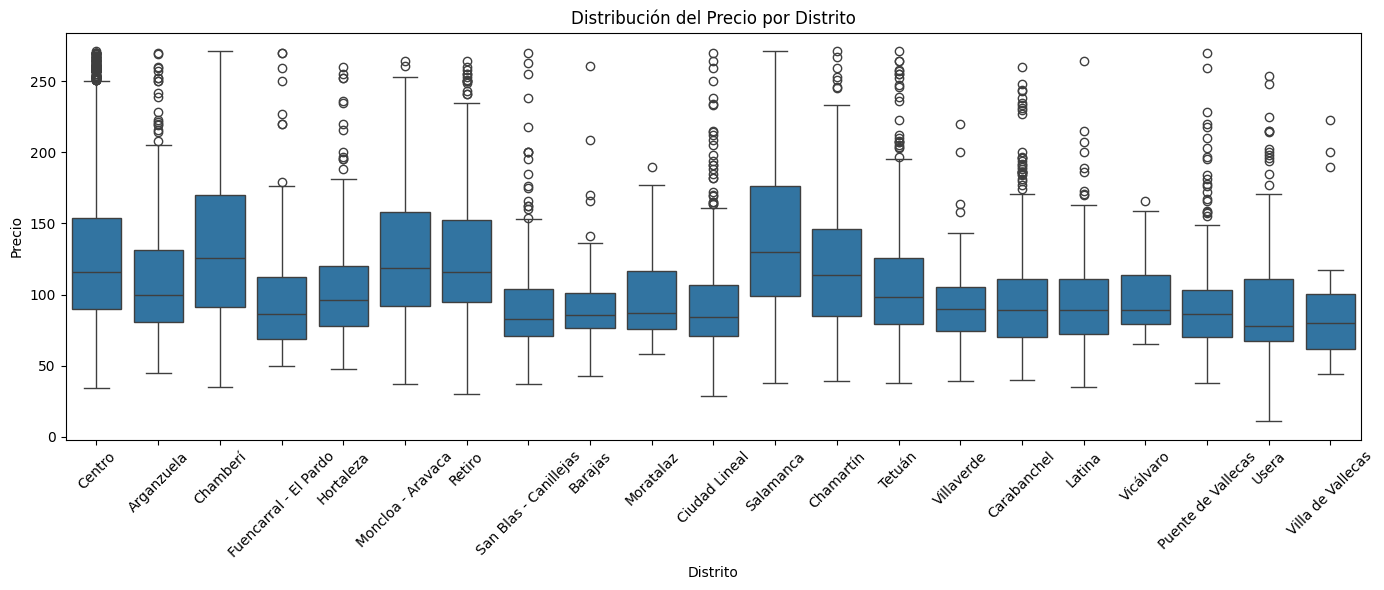

In [192]:
# Visualización del precio por neighbourhood_group_cleansed
plt.figure(figsize=(14, 6))
sns.boxplot(x='neighbourhood_group_cleansed', y='price', data=df)
plt.title('Distribución del Precio por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

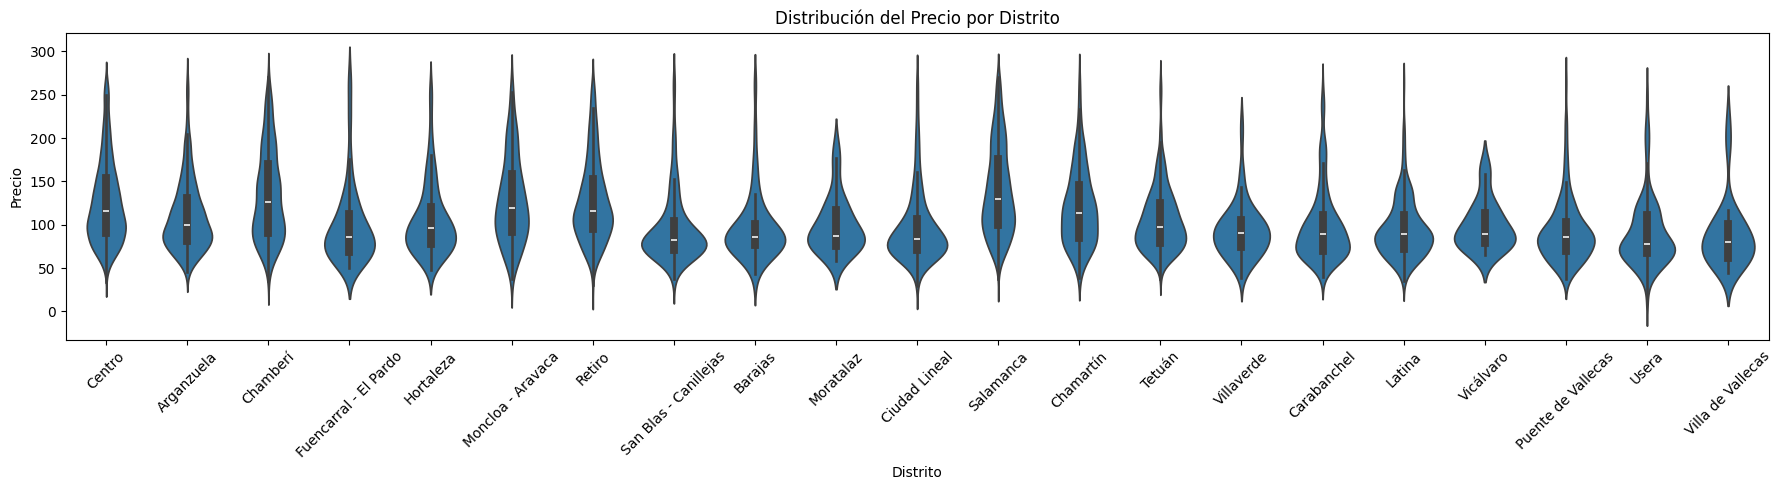

In [193]:
# Visualización del precio por neighbourhood_group_cleansed
plt.figure(figsize=(18, 5))
sns.violinplot(x='neighbourhood_group_cleansed', y='price', data=df)
plt.title('Distribución del Precio por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En el gráfico anterior se puede ver los mismo que ya hemos comentado, observándose aquellos distritos con precios medios más altos.

También se puede ver que, por un lado, en los distritos "más caros" las distribuciones de los precios parecen estás más repartidos sin tanta concentración en un rango de precios más específico, parece que aquellos distritos "más baratos" sí que muestran una concentración más importante de sus apartamentos en los precios más bajos.

#### Renta media neta/hogar/distrito

In [194]:
# Estadísticas descriptivas de variables numéricas
numeric_vars = ['renta_bin']
print("Estadísticas descriptivas de variables numéricas:")
df[numeric_vars].describe()

Estadísticas descriptivas de variables numéricas:


renta_bin
count      12637
unique         5
top         bajo
freq        7446

In [195]:
df_rentas[['Distrito', 'Renta neta media por hogar']].sort_values('Renta neta media por hogar', ascending=False)

Distrito  Renta neta media por hogar
4               Chamartín                     74842.0
8       Moncloa - Aravaca                     68238.0
3               Salamanca                     64925.0
2                  Retiro                     60762.0
6                Chamberí                     60032.0
7   Fuencarral - El Pardo                     58214.0
15              Hortaleza                     57506.0
20                Barajas                     54343.0
1              Arganzuela                     49236.0
14          Ciudad Lineal                     43738.0
5                  Tetuán                     42465.0
19  San Blas - Canillejas                     41474.0
0                  Centro                     41059.0
13              Moratalaz                     40325.0
18              Vicálvaro                     39505.0
17      Villa de Vallecas                     36998.0
9                  Latina                     35669.0
10            Carabanchel                     33786.0
16             Villaverde                     32527.0
11                  Usera                     31996.0
12     Puente de Vallecas                     30339.0

Efectivamente, si observamos los precios/noche medios de cada uno de los distritos y los comparamos con las rentas netas medias por hogar de cada distrito, se puede ver que más o menos coinciden los distritos más caros con aquellos con rentas medias por hogar más altas, lo cual tiene sentido.

#### Distancias a puntos estratégicos

Estudiemos la importancia que puede tener el hecho de que los apartamentos se encuentren cerca de puntos estratégicos de Madrid con el **precio/noche** de los apartamentos.

In [196]:
# Estadísticas descriptivas de variables numéricas
numeric_vars = ['distance_to_center', 'distance_to_retiro', 'distance_to_atocha', 'distance_to_chamartin']
print("Estadísticas descriptivas de variables numéricas:")
df[numeric_vars].describe()

Estadísticas descriptivas de variables numéricas:


distance_to_center  distance_to_retiro  distance_to_atocha  \
count        12637.000000        12637.000000        12637.000000   
mean             0.024505            0.027893            0.030243   
std              0.023746            0.019392            0.021255   
min              0.000089            0.000743            0.000037   
25%              0.007591            0.015396            0.017233   
50%              0.014740            0.021242            0.023181   
75%              0.035861            0.034182            0.037482   
max              0.241300            0.254034            0.258102   

       distance_to_chamartin  
count           12637.000000  
mean                0.056309  
std                 0.020444  
min                 0.000354  
25%                 0.047260  
50%                 0.056479  
75%                 0.066066  
max                 0.224818

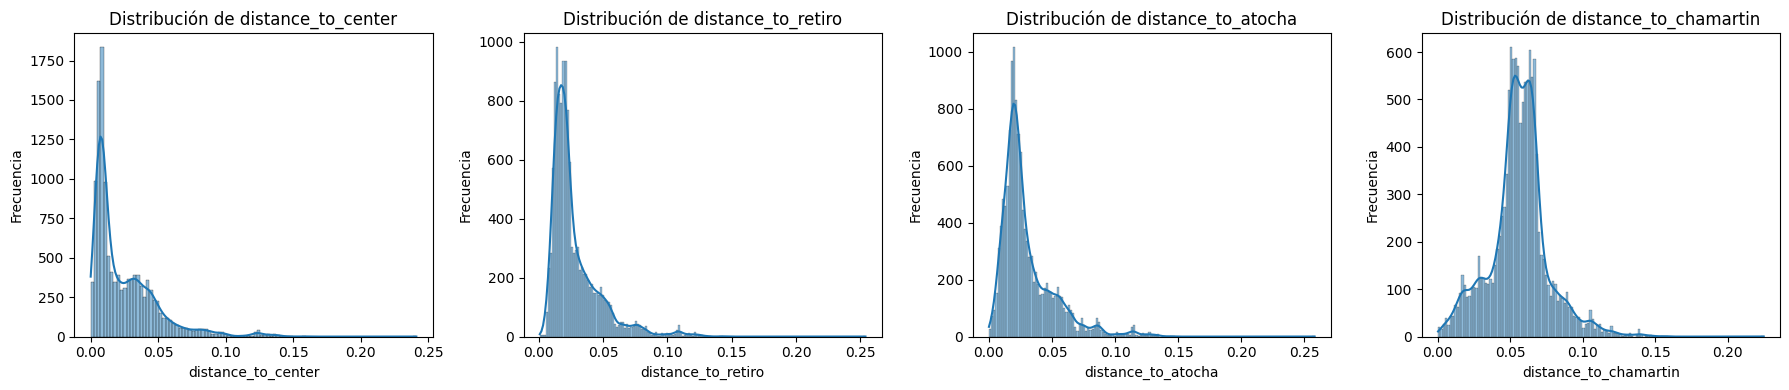

In [197]:
# Histogramas de variables numéricas
fig, axes = plt.subplots(1, 4, figsize=(18, 4))
axes = axes.flatten()

for i, var in enumerate(numeric_vars):
    sns.histplot(df[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

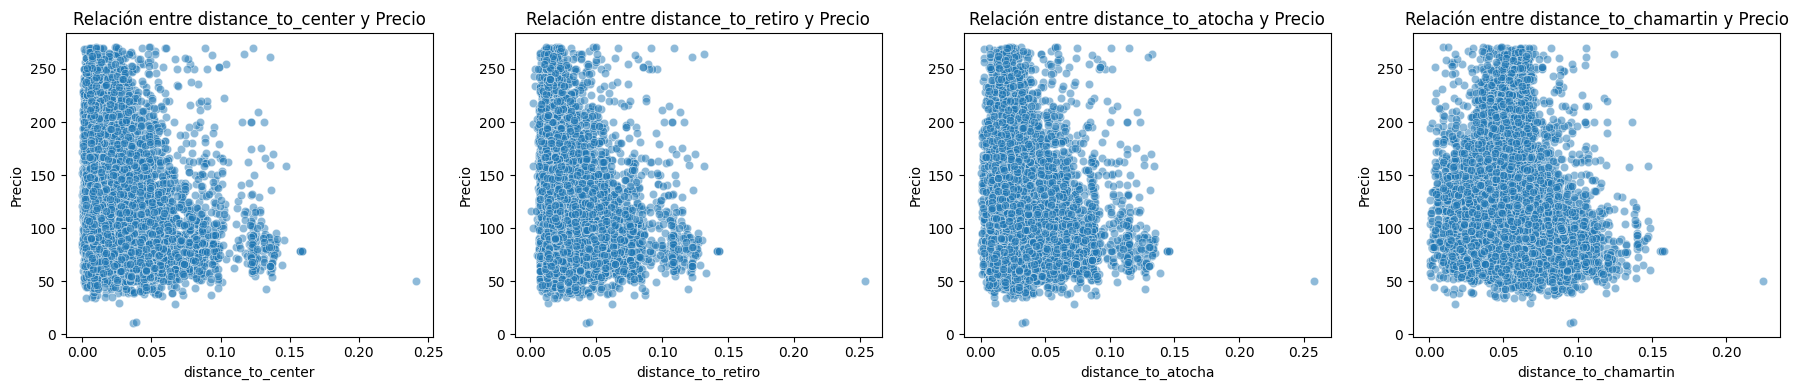

In [198]:
# Relación entre variables numéricas y precio
fig, axes = plt.subplots(1, 4, figsize=(18, 4))
axes = axes.flatten()

for i, var in enumerate(numeric_vars):
    sns.scatterplot(x=var, y='price', data=df, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Relación entre {var} y Precio')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Precio')

plt.tight_layout()
plt.show()

Se puede observar (sobre todo con la última figura) que, en general, según nos vamos alejando de los puntos de interés definidos, la mayoría de los apartamentos tienen precios más bajos.

Esto, efectivamente, demuestra la importancia de la localización de los apartamentos, siendo más econónómicos cuanto más nos alejanos de algunos puntos de gran interés de la ciudad de Madrid.

#### Distancias a paradas de transportes públicos

Estudiemos la importancia de la cercanía paradas de diferentes medios de transporte públicos y cómo afecta a los precios/noche de los apartamentos.

In [199]:
# Estadísticas descriptivas de variables numéricas
numeric_vars = ['DISTANCE_TO_METRO', 'DISTANCE_TO_CERCANIAS', 'DISTANCE_TO_EMT', 'DISTANCE_TO_INTERURBANOS', 'DISTANCE_TO_MLO']
print("Estadísticas descriptivas de variables numéricas:")
df[numeric_vars].describe()

Estadísticas descriptivas de variables numéricas:


DISTANCE_TO_METRO  DISTANCE_TO_CERCANIAS  DISTANCE_TO_EMT  \
count       12637.000000           12637.000000     12637.000000   
mean          299.168287            1035.161145       103.839083   
std           364.781993             810.472159       130.676099   
min             1.697365              13.897336         0.446418   
25%           157.707395             541.077766        58.798853   
50%           236.222606             791.354106        93.440866   
75%           344.814070            1304.001462       133.684246   
max         16207.790657            5510.602114     11832.473329   

       DISTANCE_TO_INTERURBANOS  DISTANCE_TO_MLO  
count              12637.000000     12637.000000  
mean                1017.564129      6134.281502  
std                  494.413144      1744.473736  
min                   10.129051        99.042602  
25%                  626.085281      5418.351798  
50%                 1051.677196      6266.369877  
75%                 1369.554055      7210.998453  
max                 5288.715165     16558.005194

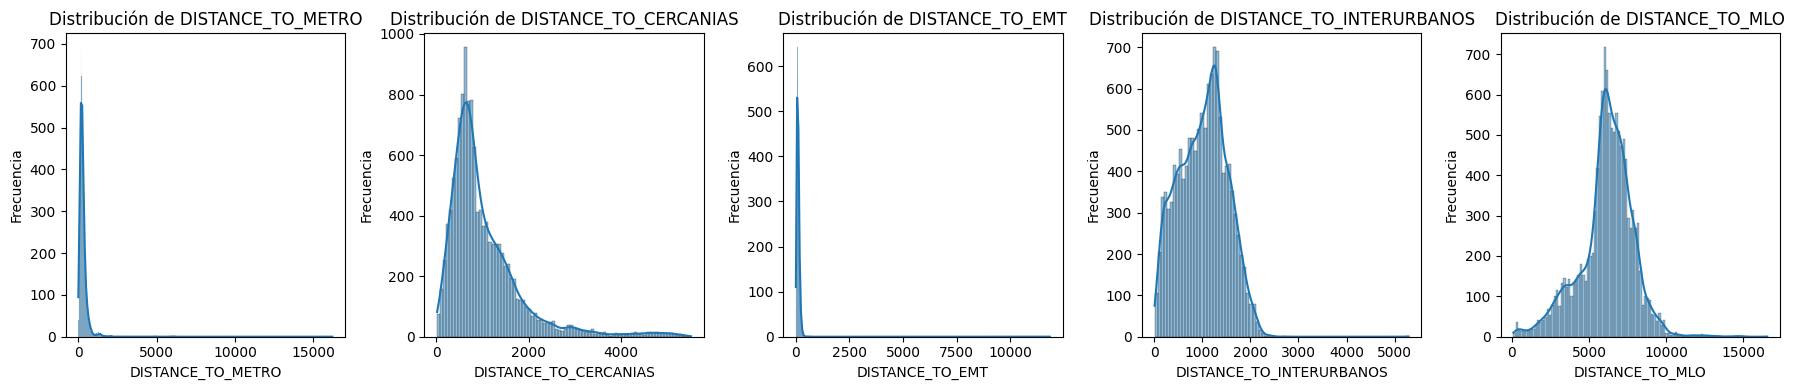

In [200]:
# Histogramas de variables numéricas
fig, axes = plt.subplots(1, 5, figsize=(18, 4))
axes = axes.flatten()

for i, var in enumerate(numeric_vars):
    sns.histplot(df[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

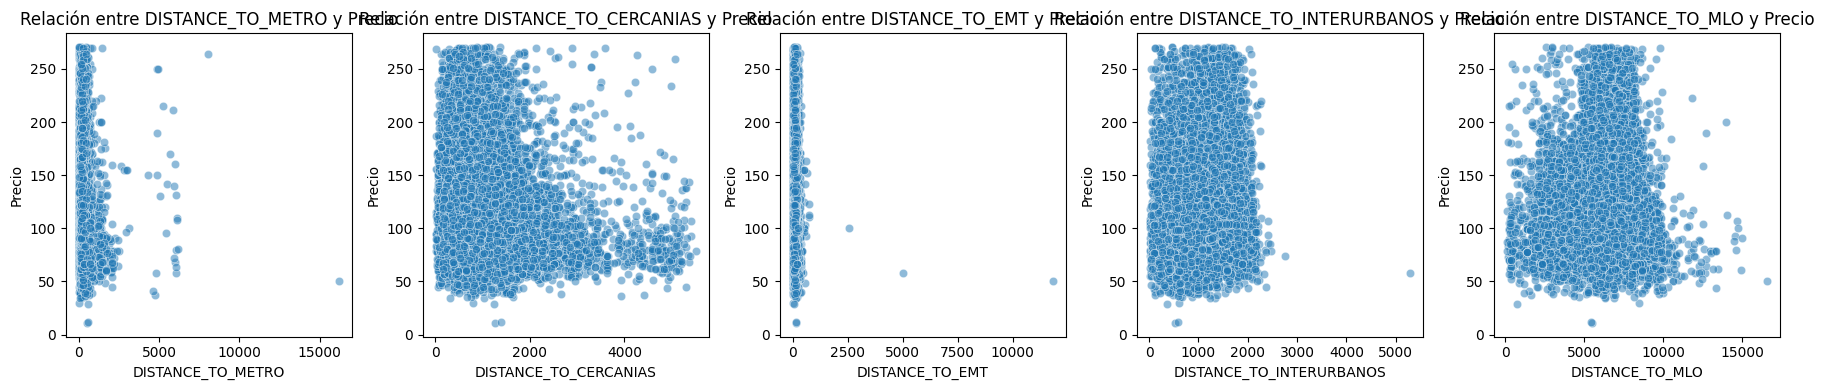

In [201]:
# Relación entre variables numéricas y precio
fig, axes = plt.subplots(1, 5, figsize=(18, 4))
axes = axes.flatten()

for i, var in enumerate(numeric_vars):
    sns.scatterplot(x=var, y='price', data=df, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Relación entre {var} y Precio')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Precio')

plt.tight_layout()
plt.show()

En este caso, vemos algo parecido como en el caso de los puntos estratégicos de Madrid. Solo que en este caso se puede observar cuáles son los transportes públicos que priorizan los usuarios de AirBnB a la obra de buscar un apartamento.

Se observa que es en el casos de las paradas de cercanías donde más se ve esta dinámica en la que, cuanto más te alejas de estas estaciones, menor tiende a ser el precio.

### _Targets_

En este apartado haremos un análisis de los 2 posibles _targets_ que tendremos en cuenta para entrenar los modelos de predicción.

#### Precio/noche

In [202]:
df['price'].describe()

count    12637.000000
mean       120.062990
std         47.736212
min         11.000000
25%         84.000000
50%        109.000000
75%        147.000000
max        271.000000
Name: price, dtype: float64

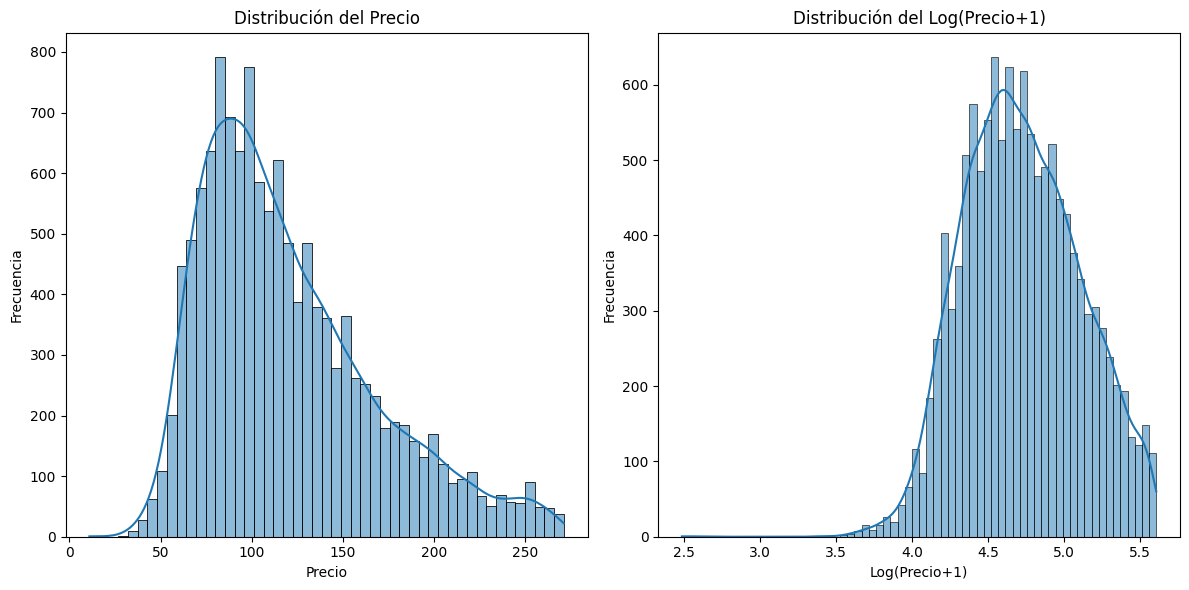

In [203]:
# Visualización de la distribución del precio
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title('Distribución del Precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Aplicamos transformación logarítmica para visualizar mejor
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True)
plt.title('Distribución del Log(Precio+1)')
plt.xlabel('Log(Precio+1)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

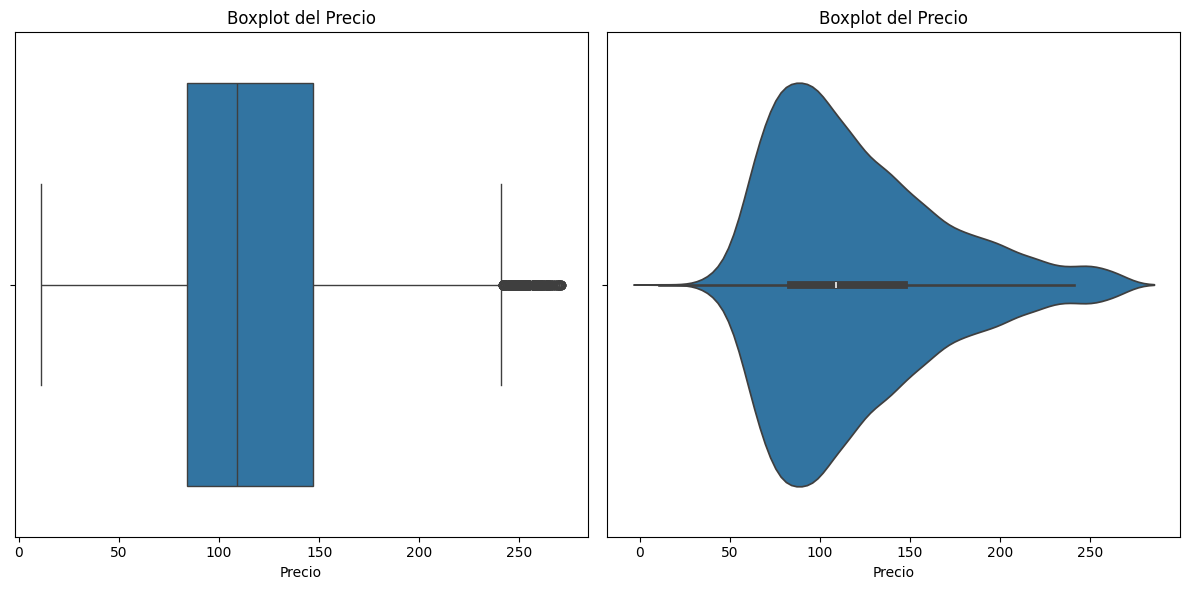

In [204]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['price'])
plt.title('Boxplot del Precio')
plt.xlabel('Precio')

plt.subplot(1, 2, 2)
sns.violinplot(x=df['price'])
plt.title('Boxplot del Precio')
plt.xlabel('Precio')

plt.tight_layout()
plt.show()

In [205]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de Pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1', 'variable_2', 'r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')

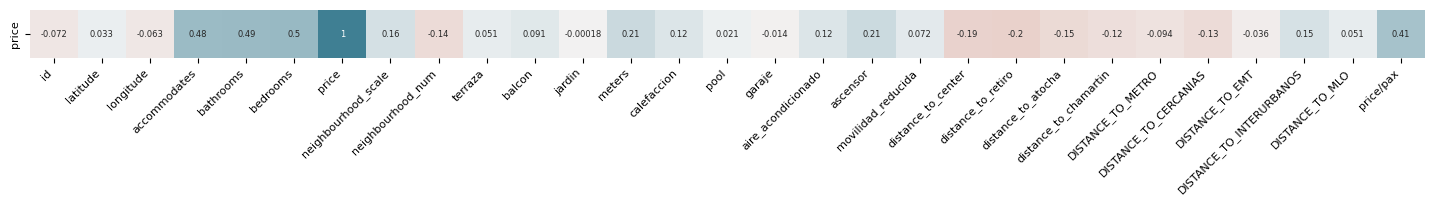

In [206]:
filtered_corr_mat = corr_matrix.loc[['price'], :]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))

sns.heatmap(
    filtered_corr_mat,
    annot = True,
    cbar = False,
    annot_kws = {'size': 6},
    vmin = -1,
    vmax = 1,
    center = 0,
    cmap = sns.diverging_palette(20, 220, n=220),
    square = True,
    ax = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
)

ax.tick_params(labelsize = 8)

El último gráfico es un mapa de calor que representa las correlaciones entre nuestro _target_ y todas las variables que hemos estado estudiando hasta ahora. Y nos da la sensación que nos da la razón en muchas de las hipótesis que hemos ido formulando según analizávamos todos los datos anteriores.

Por un lado, es evidente la importancia que tienen la cantidad de habitaciones y baños ya que es una de las primeras cosas que buscan los usuarios a la hora de alquilar un apartamentos de corta estancia.

Además de eso, se observa que, de los diferentes servicios que se pueden ofrecer en un apartamento turísitico, los que parece tener una mayor importancia y que puede afectar más al precio son el **ascensor**, la **calefacción** y el **aire acondicionado**, mientras que el que menos parece afectar es el **jardín**. Lo cual no nos sorprende dado que lo hemos podido ver ya mientras analizábamos cada una de estas variables por separado.

Por otro lado, observamos la importancia que tienen en general todas aquellas variables relacionadas con la ubicación de los apartamentos. En particular, parece tener vastante relevancia, por ejemplo, el distrito en el que se encuentran los apartamentos, sea como sea que representemos dichos valores (_neighbourhood_scale_ o _neighbourhood_num_), lo cual comprobaremos más adelante entrenando los modelos con las diferentes formas de representar esta información.

En cuanto a la relevancia de los puntos de interés, vemos que tienen una correlación bastante fuerte con el **precio/noche**, sobre todo la cercanía a la Puerta del Sol y al Parque del Retiro, dos localizaciones clave para los turistas.

Si hablamos de la cercanía a las paradas de los diferentes medios de transporte, parece tener mayor correlación con nuestro _target_ la distancia a las estaciones de cercanías y a las paradas de autobuses interurbanos.

#### Precio/noche/ocupante

Estudiemos el _target_ **precio/noche/ocupante**.

In [207]:
df['price/pax'].describe()

count    12637.000000
mean        36.288764
std         16.457263
min          5.500000
25%         24.750000
50%         33.000000
75%         44.000000
max        250.000000
Name: price/pax, dtype: float64

Evidentemente se observa que los precios son menores que en el caso del _target_ anterior. Además, parece presentar una distribución muy parecida.

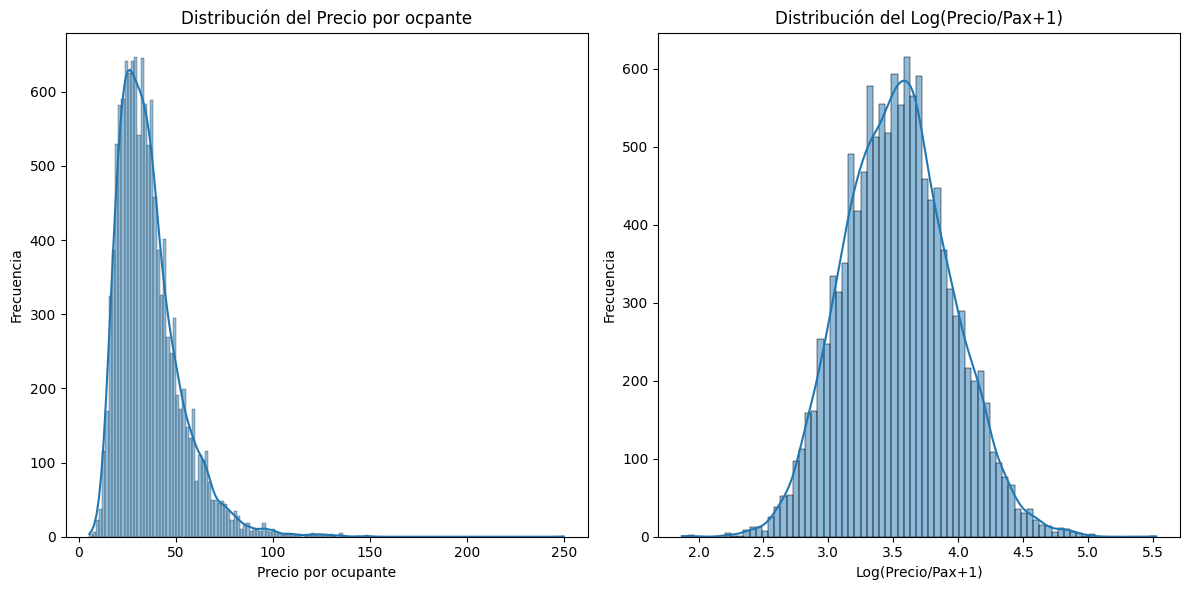

In [208]:
# Visualización de la distribución del precio
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['price/pax'], kde=True)
plt.title('Distribución del Precio por ocpante')
plt.xlabel('Precio por ocupante')
plt.ylabel('Frecuencia')

# Aplicamos transformación logarítmica para visualizar mejor
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price/pax']), kde=True)
plt.title('Distribución del Log(Precio/Pax+1)')
plt.xlabel('Log(Precio/Pax+1)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

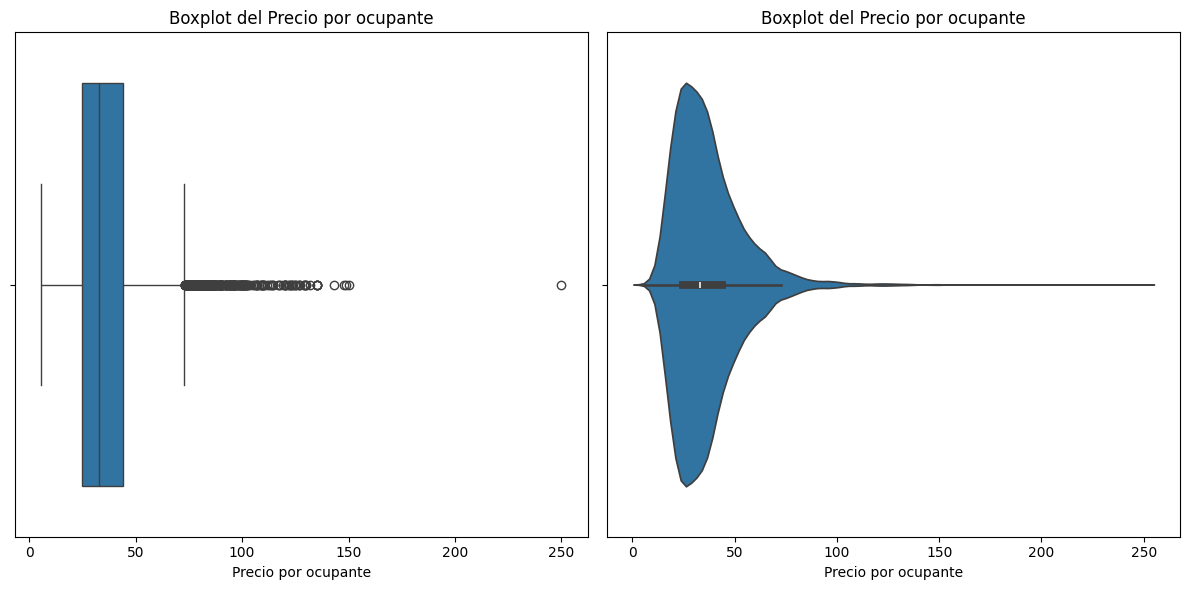

In [209]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['price/pax'])
plt.title('Boxplot del Precio por ocupante')
plt.xlabel('Precio por ocupante')

plt.subplot(1, 2, 2)
sns.violinplot(x=df['price/pax'])
plt.title('Boxplot del Precio por ocupante')
plt.xlabel('Precio por ocupante')

plt.tight_layout()
plt.show()

Vemos que, en caso de utilizar el presente _target_, es muy posible que tengamos que hacer otra limpieza de _outliers_.

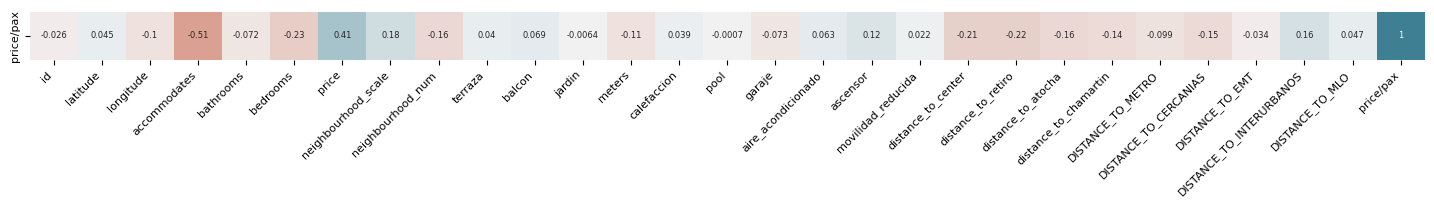

In [210]:
filtered_corr_mat = corr_matrix.loc[['price/pax'], :]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))

sns.heatmap(
    filtered_corr_mat,
    annot = True,
    cbar = False,
    annot_kws = {'size': 6},
    vmin = -1,
    vmax = 1,
    center = 0,
    cmap = sns.diverging_palette(20, 220, n=220),
    square = True,
    ax = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
)

ax.tick_params(labelsize = 8)

Observamos algo parecido al caso del _target_ **precio/noche** pero con algunas diferencias.

Por un lado, parece que utilizando el presente _target_, lo existe una correlación tan fuerte con las variables de **habitaciones** y **baños**. Esto se puede deber a que, dado que para este target hemos dividido el precio/noche por la cantidad máxima de ocupantes que pueden haber en los apartamentos, la información que nos podía ofrecer de forma indirecta estas variables ya se ha incluído dentro del _target_ que estamos tratando. De forma que sería, de alguna forma, algo redundante. Sin embargo, sigue teniendo bastante correlación con la cantidad de **habitaciones**.

Por otro lado, vemos que en las correlaciones con los servicios, tiene un comportamiento parecido al _target_ anterior, teniendo una "buena" correlación con la variable de **ascensor** y muy poca correlación con la variable de **jardín**. Sin embargo, parece que la variables de **calefacción** y **aire acondicionado** han perdido esa fuerte influencia que presentaban en el target de **precio/noche**, lo cual no parece tener mucho sentido a primera vista.

Fijándonos en las variables referentes a la localización del apartamento, vemos que en este caso también tienen una gran correlación con el presente _target_, siendo importante el distrito donde se encentran los apartamentos y los puuntos de interés (sobre todo distancia a Puerta del Sol y al Parque del Retiro como pasaba en el _target_ anterior). Y lo mismo se puede ver en el caso de las distancias a las paradas de los diferentes medios de transporte, en las que ocurre exactamente lo mismo que con el _target_ de **precio/noche**.

## Conclusiones

Como conclusión del estudio y análisis que se ha llevado a cabo en el presente documento, vemos lo siguiente.

Por un lado, en lo que respecta a variables referentes a los que ofrecen los apartamentos propiamente dichos, sin duda los parámetros que tienen un mayor peso en el precio de las viviendas son la cantidad de **habitaciones** y **baños**. Esto tiene sentido dado que, uno de los aspectos más importantes en estos casos es la superficie. Y estas 2 variables están estrechamente relacionadas con los m2. También tienen mucho peso la existencia de **ascensor**, **calefacción** y **aire acondicionado**. Y tiene sentido que en apartamentos de grandes ciudades como Madrid estos sean servicios de gran importancia a la hora de alquilar una vivienda de corta estancia o turística. Cosas como la **piscina** o el **jardín**, en grandes ciudades no tiene tanto sentido tenerlas en cuenta porque solo se podrán encontrar lejos del centro de las ciudades, lo cual hace que el valor de la vivienda como apartamento turítico baje de forma significativa.

Por otro lado, no nos sorprende el peso que tienen las variables que hacen referencia a la localización de los apartamentos porque es uno de los aspectos que más se tiene en cuenta a la hora de alquilar este tipo de viviendas (como puede ser el **distrito** en el que se encuentran). En particular, al tratarse de apartamentos turísticos, lo usuarios intentan acercarse lo máximo posible a ciertos puntos estratégicos de la ciudad, como son en este caso **Puerta del Sol** y **Parque del Retiro**. También afecta al precio la distancia a la que se encuentren los apartamentos de diferentes estaciones de transporte público. Sobre todo hemos observado la tendencia a que los precios puedan aumentar según nos acercamos a estaciones de cercanías y de autobuses interurbanos. Al principio, pensamos que la distancia a las estaciones de metro también tendría un gran peso. Sin embargo, hemos visto que no es así. Esto puede deverse al hecho de que estas estaciones están repartidas de tal forma por toda la ciudad que cualquier apartamento se encontrará cerca de una parada de metro, de forma que deja de afectar a los precios de los apartamentos turísiticos.

Por últimos, de los 2 posibles _targets_ que hemos estudiado, solo tiene sentido trabajar con el de **precio/noche** por varias razones. Primero, porque este target parece guardar correlaciones más fuertes con varias variables en comparación con el target de **precio/noche/ocupante**, de forma que esperamos tener mejores resultados en nuestras predicciones utilizando como target el **precio/noche**. Segundo, porque para obtener el segundo target, se necesita la **cantidad de ocupantes máxima** de los apartamentos, dato con el que contamos en el _data-set_ de AirBnB pero que no tenemos en el de Idealista. Esto nos obligaría a obtener dicha variables a partir de otras como la superficie, la cantidad de habitaciones o la cantidad de baños. Pero no existe una forma consistente de obtener dicha variable con la información de la que disponemos. 

Cabe comentar que un _target_ que podría ser más interesante utilizar para las predicciones sería el **precio/noche/m2** ya que targets del estilo _precio/m2_ suelen dar muy buenos resultados en la predicción del valor de viviendas. Sin embargo, como ya hemos visto, no contamos con la información de la superficie en la gran mayoría de los anuncios de nuestro _data-set_ de AirBnB, por lo que es inviable utilizar este dato.

A continuación, guardamos el _data-set_ tratado y procesado para poder llevar a cabo el entrenamiento de los modelos de predicción.

In [214]:
dropping_cols = [
    'price/pax',
    'jardin',
    'meters',
    'amenities',
    'accommodates',
    'longitude',
    'latitude',
    'listing_url',
    'id'
]

df_def = df.drop(dropping_cols, axis=1)

In [215]:
df_def.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12637 entries, 5 to 25285
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_group_cleansed  12637 non-null  object 
 1   bathrooms                     12637 non-null  int64  
 2   bedrooms                      12637 non-null  int64  
 3   price                         12637 non-null  float64
 4   neighbourhood_scale           12637 non-null  float64
 5   neighbourhood_num             12637 non-null  int64  
 6   terraza                       12637 non-null  int64  
 7   balcon                        12637 non-null  int64  
 8   calefaccion                   12637 non-null  int64  
 9   pool                          12637 non-null  int64  
 10  garaje                        12637 non-null  int64  
 11  aire_acondicionado            12637 non-null  int64  
 12  ascensor                      12637 non-null  int64  
 13  movili

In [216]:
df_def.to_csv('../data/df_pruebas_modelos.csv')